In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
from scipy.stats import bartlett


In [35]:
# path = 'C:\\Users\\USER\\PythonDataWorkSpace\\이차전지프로젝트'
file = 'bat_process_final2.csv'

df = pd.read_csv(os.path.join(file), encoding='utf-8')
df

,tray_id,judge,rta1_cell_no,rta1_box_col,rta1_box_row,rta1_box_dan,hta1_box_col,hta1_box_row,hta1_box_dan,rta2_box_col,...,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an,sa4_box_row,sa4_box_col,sa4_box_dan
0,TRAY-1077,양품,18,2,28,10,2,13,7,2,...,5.0,6.7,4687.0,37586.0,91.0,610.0,109.0,4.0,49.0,4.0
1,TRAY-1077,양품,3,2,28,10,2,13,7,2,...,5.1,6.8,4707.0,37594.0,93.0,568.0,117.0,4.0,49.0,4.0
2,TRAY-1077,양품,8,2,28,10,2,13,7,2,...,5.1,6.7,4711.0,37593.0,92.0,547.0,37.0,4.0,49.0,4.0
3,TRAY-1077,양품,16,2,28,10,2,13,7,2,...,5.0,6.7,4692.0,37593.0,91.0,610.0,-3.0,4.0,49.0,4.0
4,TRAY-1077,양품,6,2,28,10,2,13,7,2,...,5.1,6.8,4712.0,37590.0,93.0,568.0,180.0,4.0,49.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40989,TRAY-2791,양품,16,8,21,3,2,23,6,3,...,5.3,7.2,4745.0,37583.0,94.0,643.0,-35.0,2.0,17.0,12.0
40990,TRAY-2791,양품,14,8,21,3,2,23,6,3,...,5.3,7.1,4746.0,37583.0,94.0,620.0,89.0,2.0,17.0,12.0
40991,TRAY-2791,양품,2,8,21,3,2,23,6,3,...,5.2,7.0,4782.0,37595.0,92.0,597.0,-23.0,2.0,17.0,12.0
40992,TRAY-2791,양품,15,8,21,3,2,23,6,3,...,5.3,7.0,4751.0,37590.0,95.0,620.0,3.0,2.0,17.0,12.0


In [ ]:
df.info()

In [ ]:
print('Data 구조:',df.shape)
print('변수:',df.columns)

In [5]:
df.dtypes

NameError: name 'df' is not defined

In [5]:
df.describe

<bound method NDFrame.describe of          tray_id judge  rta1_cell_no  rta1_box_col  rta1_box_row  \
0      TRAY-1077    양품            18             2            28   
1      TRAY-1077    양품             3             2            28   
2      TRAY-1077    양품             8             2            28   
3      TRAY-1077    양품            16             2            28   
4      TRAY-1077    양품             6             2            28   
...          ...   ...           ...           ...           ...   
40989  TRAY-2791    양품            16             8            21   
40990  TRAY-2791    양품            14             8            21   
40991  TRAY-2791    양품             2             8            21   
40992  TRAY-2791    양품            15             8            21   
40993  TRAY-2791    불량            10             8            21   

       rta1_box_dan  hta1_box_col  hta1_box_row  hta1_box_dan  rta2_box_col  \
0                10             2            13             7         

In [6]:
# 결측치 확인
df_col = df.columns
columns_with_null = df.columns[df.isnull().any()]
null_counts = df[columns_with_null].isnull().sum()

result = pd.DataFrame({'Column': columns_with_null, 'Null_Count': null_counts})
print(result)

Empty DataFrame
Columns: [Column, Null_Count]
Index: []


In [ ]:
# 같은 이름의 데이터가 22개 이하인 tray_id 찾기
tray_id_counts = df['tray_id'].value_counts()
tray_ids_to_remove = tray_id_counts[tray_id_counts <= 22].index

# 같은 이름의 데이터가 22개 이하인 행 삭제
df = df[~df['tray_id'].isin(tray_ids_to_remove)]



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40994 entries, 0 to 40993
Data columns (total 85 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tray_id            40994 non-null  object 
 1   judge              40994 non-null  object 
 2   rta1_cell_no       40994 non-null  int64  
 3   rta1_box_col       40994 non-null  int64  
 4   rta1_box_row       40994 non-null  int64  
 5   rta1_box_dan       40994 non-null  int64  
 6   hta1_box_col       40994 non-null  int64  
 7   hta1_box_row       40994 non-null  int64  
 8   hta1_box_dan       40994 non-null  int64  
 9   rta2_box_col       40994 non-null  int64  
 10  rta2_box_row       40994 non-null  int64  
 11  rta2_box_dan       40994 non-null  int64  
 12  ocv1_ocv           40994 non-null  int64  
 13  ocv1_box_col       40994 non-null  int64  
 14  ocv1_box_dan       40994 non-null  int64  
 15  c1_curr_end        40994 non-null  int64  
 16  c1_voltage_avg     409

In [ ]:
# 중복값 확인
df.duplicated().sum()

## 시각화

In [ ]:
def visualization(start, end):
    col = df_col[start:end]
    
    print(df[col].info())
    return df[col].hist(figsize=(15, 10))

def charge(index):
    charge_1 = df_col[18:26]
    charge_2 = df_col[33:41]
    charge_3 = df_col[48:58]
    charge_4 = df_col[65:75]
    
    return df[[charge_1[index], charge_2[index], charge_3[index], charge_4[index]]].hist(figsize=(15, 10))

1. Aging

In [ ]:
# 1. Aging
visualization(5, 18)

2. Charge

In [ ]:
# 2. charge 1
visualization(18, 26)

In [ ]:
# 2. charge 2
visualization(33, 41)

In [ ]:
# 2. charge 3
visualization(48, 58)

In [ ]:
# 2. charge 4
visualization(65, 75)

In [ ]:
charge(0)

In [ ]:
charge(1)

In [ ]:
charge_1 = df_col[18:26]
charge_2 = df_col[33:41]
charge_3 = df_col[48:58]
charge_4 = df_col[65:75]

# df[charge_1[0]]
df[charge_2[0]].plot()
# df[charge_3[0]]
# df[charge_4[0]]


3. discharge

In [ ]:
# 3. discahge 1
visualization(26, 33)

In [ ]:
# 3. discahge 2
visualization(41, 48)

In [ ]:
# 3. discahge 3
visualization(58, 65)

4. formation ocv

In [ ]:
# 4. formation ocv
visualization(75, 78)

5. powergrading

In [ ]:
# 5. powergrading
visualization(78, 85)

6. powercharging

In [ ]:
# 6. powercharging
visualization(85, 90)

7. 출하 Aging

In [ ]:
# 7. 출하 Aging
visualization(90, 102)

8. deltaocv

In [ ]:
# 8. deltaocv
visualization(102, 104)

9. 특성 측정

In [ ]:
# 9. 특성 측정
visualization(104, 109)

# 설비에 대한 불량률 heatmap

### 막대그래프로 시각화

In [9]:
# 'rta1'의 행, 열, 단에 대한 불량과 양품의 비율 계산
rta_columns = ['rta1_box_col', 'rta1_box_row', 'rta1_box_dan']  # 'rta'의 열들
result = {}  # 결과를 저장할 딕셔너리 초기화

for column in rta_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    total_counts = grouped.sum(axis=1)
    ratios = grouped['불량'] / total_counts
    result[column] = ratios

# 결과 출력
for column, ratios in result.items():
    print(f"{column}에 대한 불량 비율:\n{ratios.sort_values(ascending=False).head(15)}")

rta1_box_col에 대한 불량 비율:
rta1_box_col
8    0.033292
4    0.032889
7    0.031633
1    0.031192
5    0.031144
6    0.030011
3    0.027919
2    0.026357
dtype: float64
rta1_box_row에 대한 불량 비율:
rta1_box_row
42    0.147849
65    0.135294
22    0.077889
1     0.071097
9     0.069140
39    0.065169
54    0.060302
16    0.056452
59    0.056112
19    0.055846
8     0.055472
20    0.049878
21    0.048826
10    0.048810
32    0.047506
dtype: float64
rta1_box_dan에 대한 불량 비율:
rta1_box_dan
5     0.041073
8     0.037684
10    0.037098
9     0.033961
6     0.032122
7     0.028724
1     0.028712
4     0.027888
2     0.027730
11    0.024564
3     0.020051
dtype: float64


In [ ]:


# 열, 단, 연을 하나의 데이터로 합치기
df['combined_feature'] = df['rta1_box_col'].astype(str) + '_' + df['rta1_box_row'].astype(str) + '_' + df['rta1_box_dan'].astype(str)

# 그룹화하여 불량 비율 계산
grouped = df.groupby(['combined_feature', 'judge']).size().unstack().fillna(0)
total_counts = grouped.sum(axis=1)
ratios = grouped['불량'] / total_counts

# 결과 출력
print("불량 비율:\n", ratios)

In [ ]:
# 불량률이 높은 순서대로 정렬하여 출력
sorted_ratios = ratios.sort_values(ascending=False)
print("불량 비율 (높은 순서대로 정렬):\n", sorted_ratios.head(40))

In [ ]:
grouped

rta1_box_col에 대한 불량/양품 수:
judge          불량    양품
rta1_box_col           
1             134  4162
2             119  4396
3             148  5153
4             180  5293
5             193  6004
6             140  4525
7             155  4745
8             188  5459


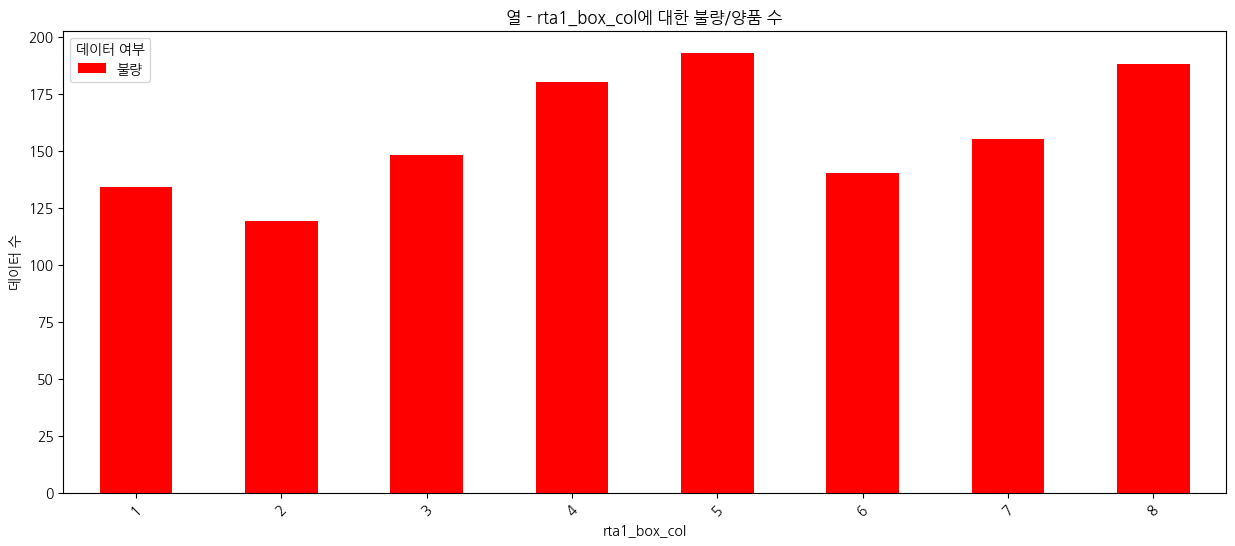

rta1_box_row에 대한 불량/양품 수:
judge         불량   양품
rta1_box_row         
1             46  601
2             17  724
3             14  583
4             32  762
5              5  793
...           ..  ...
61             2  398
62            17  678
63            28  741
64             3  297
65            23  147

[65 rows x 2 columns]


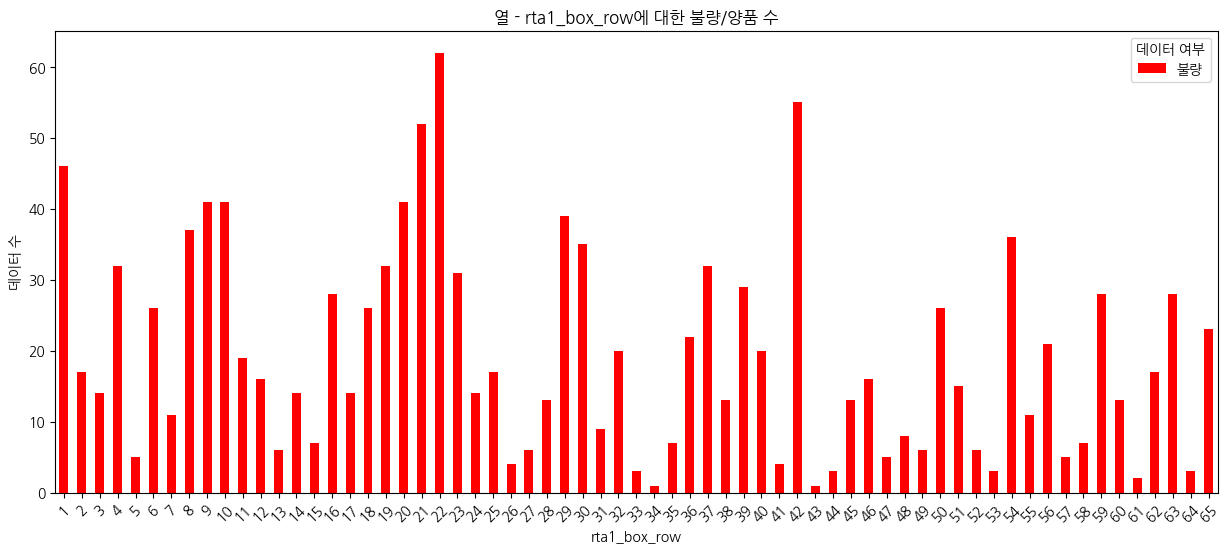

rta1_box_dan에 대한 불량/양품 수:
judge          불량    양품
rta1_box_dan           
1             146  4939
2             114  3997
3              94  4594
4             134  4671
5             173  4039
6             129  3887
7             102  3449
8             138  3524
9             128  3641
10             68  1765
11             31  1231


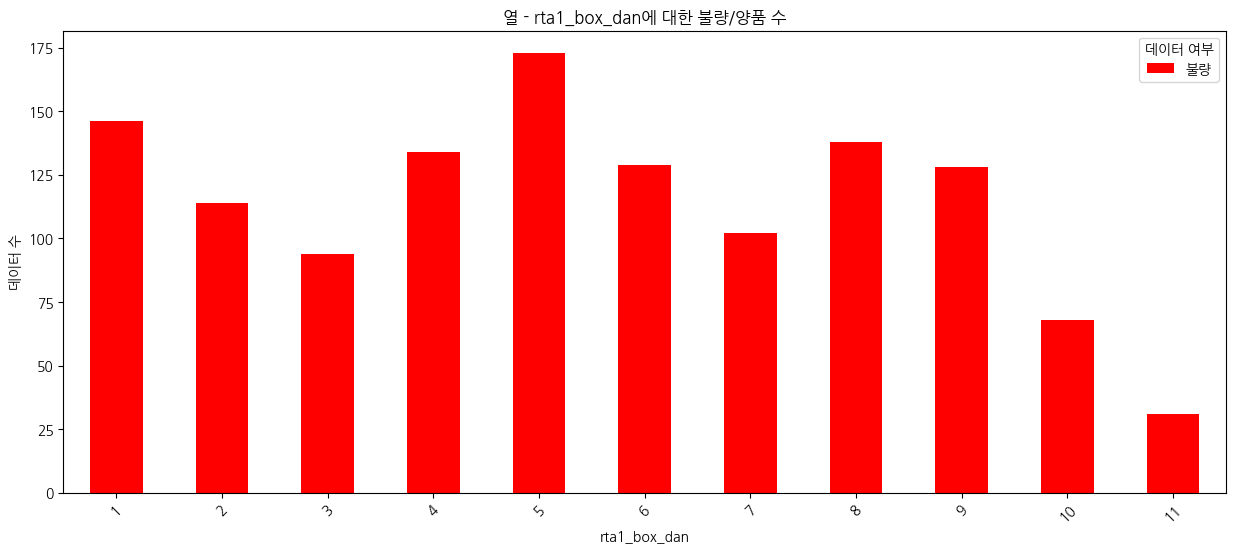

In [10]:
# 결과를 저장할 딕셔너리 초기화
result = {}

# 열에 대한 불량/양품 데이터 저장
for column in rta1_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    result[column] = grouped


# 결과 출력 및 시각화
for column, counts in result.items():
    print(f"{column}에 대한 불량/양품 수:\n{counts}")

    # 불량/양품 수 시각화 (막대 그래프)
    plt.figure(figsize=(15, 6))
    counts['불량'].plot(kind='bar', color='red', label='불량')
    # counts['양품'].plot(kind='bar', color='blue', bottom=counts['불량'], label='양품')
    plt.title(f"열 - {column}에 대한 불량/양품 수")
    plt.xlabel(column)
    plt.ylabel("데이터 수")
    plt.xticks(rotation=45)
    plt.legend(title="데이터 여부")
    plt.show()


rta1_box_col에 대한 불량/양품 수:
judge          불량    양품
rta1_box_col           
1             134  4162
2             119  4396
3             148  5153
4             180  5293
5             193  6004
6             140  4525
7             155  4745
8             188  5459


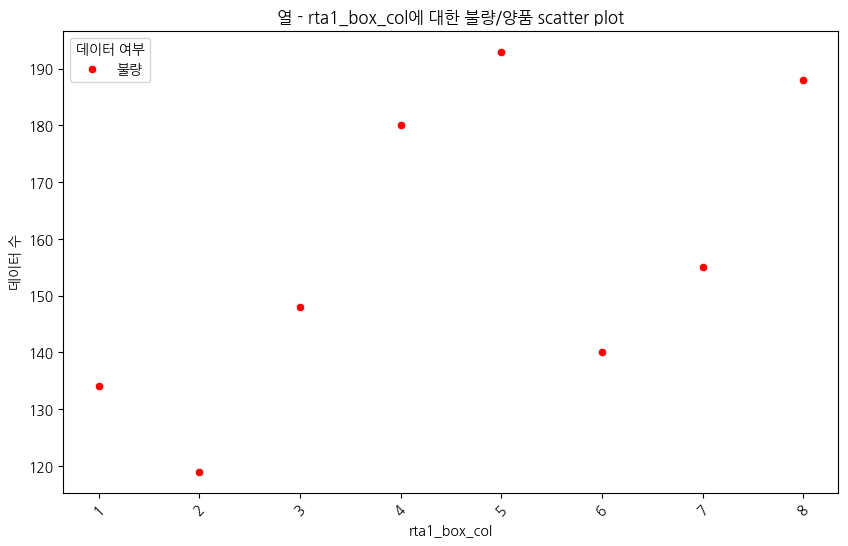

rta1_box_row에 대한 불량/양품 수:
judge         불량   양품
rta1_box_row         
1             46  601
2             17  724
3             14  583
4             32  762
5              5  793
...           ..  ...
61             2  398
62            17  678
63            28  741
64             3  297
65            23  147

[65 rows x 2 columns]


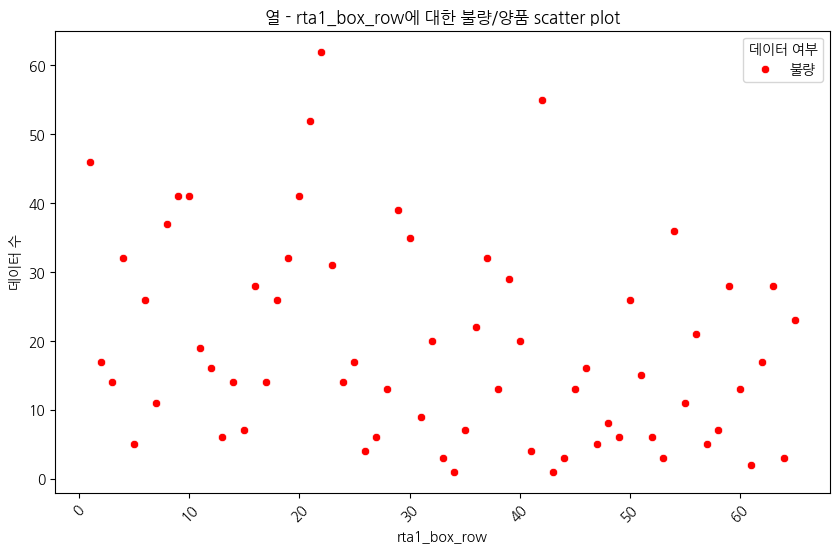

rta1_box_dan에 대한 불량/양품 수:
judge          불량    양품
rta1_box_dan           
1             146  4939
2             114  3997
3              94  4594
4             134  4671
5             173  4039
6             129  3887
7             102  3449
8             138  3524
9             128  3641
10             68  1765
11             31  1231


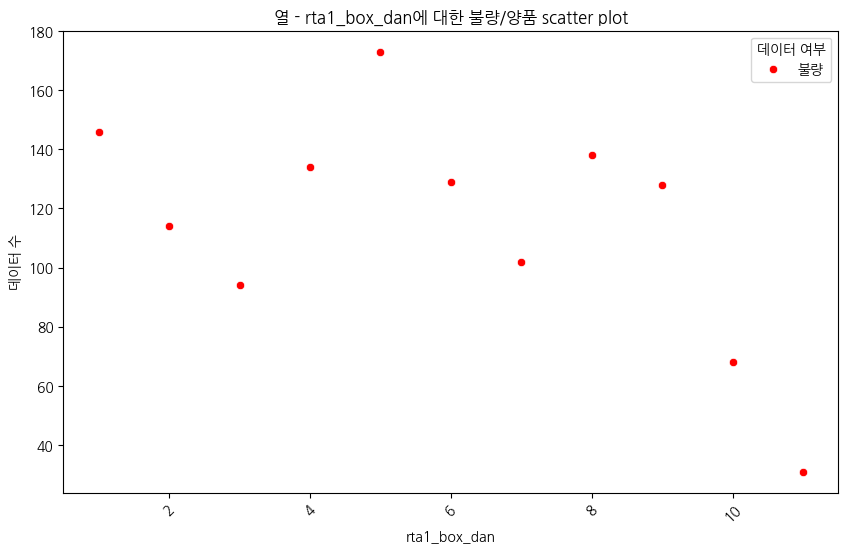

In [11]:
# 결과 출력 및 시각화
for column, counts in result.items():
    print(f"{column}에 대한 불량/양품 수:\n{counts}")

    # 불량/양품 데이터 scatter plot 시각화
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=counts, x=counts.index, y='불량', color='red', label='불량')
    # sns.scatterplot(data=counts, x=counts.index, y='양품', color='blue', label='양품')
    plt.title(f"열 - {column}에 대한 불량/양품 scatter plot")
    plt.xlabel(column)
    plt.ylabel("데이터 수")
    plt.xticks(rotation=45)
    plt.legend(title="데이터 여부")
    plt.show()

In [ ]:
# 'rta2'의 행, 열, 단에 대한 불량과 양품의 비율 계산
rta2_columns = ['rta2_box_col', 'rta2_box_row', 'rta2_box_dan']  # 'rta'의 열들
result = {}  # 결과를 저장할 딕셔너리 초기화

for column in rta2_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    total_counts = grouped.sum(axis=1)
    ratios = grouped['불량'] / total_counts
    result[column] = ratios

# 결과 출력
for column, ratios in result.items():
    print(f"{column}에 대한 불량 비율:\n{ratios.sort_values(ascending=False).head(15)}")

In [ ]:
# 결과를 저장할 딕셔너리 초기화
result = {}

# 열에 대한 불량/양품 데이터 저장
for column in rta2_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    result[column] = grouped

# 결과 출력 및 시각화
for column, counts in result.items():
    print(f"{column}에 대한 불량/양품 수:\n{counts}")

    # 불량/양품 수 시각화 (막대 그래프)
    plt.figure(figsize=(15, 6))
    counts['불량'].plot(kind='bar', color='red', label='불량')
    # counts['양품'].plot(kind='bar', color='blue', bottom=counts['불량'], label='양품')
    plt.title(f"열 - {column}에 대한 불량/양품 수")
    plt.xlabel(column)
    plt.ylabel("데이터 수")
    plt.xticks(rotation=45)
    plt.legend(title="데이터 여부")
    plt.show()


In [ ]:
# 'ocv1의 열, 단에 대한 불량과 양품의 비율 계산
ocv1_columns = ['ocv1_box_col', 'ocv1_box_dan']  # 'rta'의 열들
result = {}  # 결과를 저장할 딕셔너리 초기화

for column in ocv1_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    total_counts = grouped.sum(axis=1)
    ratios = grouped['불량'] / total_counts
    result[column] = ratios

# 결과 출력
for column, ratios in result.items():
    print(f"{column}에 대한 불량 비율:\n{ratios.sort_values(ascending=False).head(15)}")

In [ ]:
# 결과를 저장할 딕셔너리 초기화
result = {}

# 열에 대한 불량/양품 데이터 저장
for column in ocv1_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    result[column] = grouped

# 결과 출력 및 시각화
for column, counts in result.items():
    print(f"{column}에 대한 불량/양품 수:\n{counts}")

    # 불량/양품 수 시각화 (막대 그래프)
    plt.figure(figsize=(15, 6))
    counts['불량'].plot(kind='bar', color='red', label='불량')
    # counts['양품'].plot(kind='bar', color='blue', bottom=counts['불량'], label='양품')
    plt.title(f"열 - {column}에 대한 불량/양품 수")
    plt.xlabel(column)
    plt.ylabel("데이터 수")
    plt.xticks(rotation=45)
    plt.legend(title="데이터 여부")
    plt.show()


In [ ]:
# 'c1의 열, 단에 대한 불량과 양품의 비율 계산
c1_columns = ['c1_box_col', 'c1_box_dan']  # 'rta'의 열들
result = {}  # 결과를 저장할 딕셔너리 초기화

for column in c1_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    total_counts = grouped.sum(axis=1)
    ratios = grouped['불량'] / total_counts
    result[column] = ratios

# 결과 출력
for column, ratios in result.items():
    print(f"{column}에 대한 불량 비율:\n{ratios.sort_values(ascending=False).head(15)}")

In [ ]:
# 결과를 저장할 딕셔너리 초기화
result = {}

# 열에 대한 불량/양품 데이터 저장
for column in c1_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    result[column] = grouped

# 결과 출력 및 시각화
for column, counts in result.items():
    print(f"{column}에 대한 불량/양품 수:\n{counts}")

    # 불량/양품 수 시각화 (막대 그래프)
    plt.figure(figsize=(15, 6))
    counts['불량'].plot(kind='bar', color='red', label='불량')
    # counts['양품'].plot(kind='bar', color='blue', bottom=counts['불량'], label='양품')
    plt.title(f"열 - {column}에 대한 불량/양품 수")
    plt.xlabel(column)
    plt.ylabel("데이터 수")
    plt.xticks(rotation=45)
    plt.legend(title="데이터 여부")
    plt.show()

In [ ]:
# 'dc1의 열, 단에 대한 불량과 양품의 비율 계산
dc1_columns = ['dc1_box_col', 'dc1_box_dan']  # 'rta'의 열들
result = {}  # 결과를 저장할 딕셔너리 초기화

for column in dc1_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    total_counts = grouped.sum(axis=1)
    ratios = grouped['불량'] / total_counts
    result[column] = ratios

# 결과 출력
for column, ratios in result.items():
    print(f"{column}에 대한 불량 비율:\n{ratios.sort_values(ascending=False).head(15)}")

In [ ]:
# 결과를 저장할 딕셔너리 초기화
result = {}

# 열에 대한 불량/양품 데이터 저장
for column in dc1_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    result[column] = grouped

# 결과 출력 및 시각화
for column, counts in result.items():
    print(f"{column}에 대한 불량/양품 수:\n{counts}")

    # 불량/양품 수 시각화 (막대 그래프)
    plt.figure(figsize=(15, 6))
    counts['불량'].plot(kind='bar', color='red', label='불량')
    # counts['양품'].plot(kind='bar', color='blue', bottom=counts['불량'], label='양품')
    plt.title(f"열 - {column}에 대한 불량/양품 수")
    plt.xlabel(column)
    plt.ylabel("데이터 수")
    plt.xticks(rotation=45)
    plt.legend(title="데이터 여부")
    plt.show()

In [ ]:
# 'c2의 열, 단에 대한 불량과 양품의 비율 계산
c2_columns = ['c2_box_col', 'c2_box_dan']  # 'rta'의 열들
result = {}  # 결과를 저장할 딕셔너리 초기화

for column in c2_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    total_counts = grouped.sum(axis=1)
    ratios = grouped['불량'] / total_counts
    result[column] = ratios

# 결과 출력
for column, ratios in result.items():
    print(f"{column}에 대한 불량 비율:\n{ratios.sort_values(ascending=False).head(15)}")

In [ ]:
# 결과를 저장할 딕셔너리 초기화
result = {}

# 열에 대한 불량/양품 데이터 저장
for column in c2_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    result[column] = grouped

# 결과 출력 및 시각화
for column, counts in result.items():
    print(f"{column}에 대한 불량/양품 수:\n{counts}")

    # 불량/양품 수 시각화 (막대 그래프)
    plt.figure(figsize=(15, 6))
    counts['불량'].plot(kind='bar', color='red', label='불량')
    # counts['양품'].plot(kind='bar', color='blue', bottom=counts['불량'], label='양품')
    plt.title(f"열 - {column}에 대한 불량/양품 수")
    plt.xlabel(column)
    plt.ylabel("데이터 수")
    plt.xticks(rotation=45)
    plt.legend(title="데이터 여부")
    plt.show()

In [ ]:
# 'dc2의 열, 단에 대한 불량과 양품의 비율 계산
dc2_columns = ['dc2_box_col', 'dc2_box_dan']  # 'rta'의 열들
result = {}  # 결과를 저장할 딕셔너리 초기화

for column in dc2_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    total_counts = grouped.sum(axis=1)
    ratios = grouped['불량'] / total_counts
    result[column] = ratios

# 결과 출력
for column, ratios in result.items():
    print(f"{column}에 대한 불량 비율:\n{ratios.sort_values(ascending=False).head(15)}")

In [ ]:
# 결과를 저장할 딕셔너리 초기화
result = {}

# 열에 대한 불량/양품 데이터 저장
for column in dc2_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    result[column] = grouped

# 결과 출력 및 시각화
for column, counts in result.items():
    print(f"{column}에 대한 불량/양품 수:\n{counts}")

    # 불량/양품 수 시각화 (막대 그래프)
    plt.figure(figsize=(15, 6))
    counts['불량'].plot(kind='bar', color='red', label='불량')
    # counts['양품'].plot(kind='bar', color='blue', bottom=counts['불량'], label='양품')
    plt.title(f"열 - {column}에 대한 불량/양품 수")
    plt.xlabel(column)
    plt.ylabel("데이터 수")
    plt.xticks(rotation=45)
    plt.legend(title="데이터 여부")
    plt.show()

In [ ]:
# 'c3의 열, 단에 대한 불량과 양품의 비율 계산
c3_columns = ['c3_box_col', 'c3_box_dan']  # 'rta'의 열들
result = {}  # 결과를 저장할 딕셔너리 초기화

for column in c3_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    total_counts = grouped.sum(axis=1)
    ratios = grouped['불량'] / total_counts
    result[column] = ratios

# 결과 출력
for column, ratios in result.items():
    print(f"{column}에 대한 불량 비율:\n{ratios.sort_values(ascending=False).head(15)}")

In [ ]:
# 결과를 저장할 딕셔너리 초기화
result = {}

# 열에 대한 불량/양품 데이터 저장
for column in c3_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    result[column] = grouped

# 결과 출력 및 시각화
for column, counts in result.items():
    print(f"{column}에 대한 불량/양품 수:\n{counts}")

    # 불량/양품 수 시각화 (막대 그래프)
    plt.figure(figsize=(15, 6))
    counts['불량'].plot(kind='bar', color='red', label='불량')
    # counts['양품'].plot(kind='bar', color='blue', bottom=counts['불량'], label='양품')
    plt.title(f"열 - {column}에 대한 불량/양품 수")
    plt.xlabel(column)
    plt.ylabel("데이터 수")
    plt.xticks(rotation=45)
    plt.legend(title="데이터 여부")
    plt.show()

In [ ]:
# 'dc3의 열, 단에 대한 불량과 양품의 비율 계산
dc3_columns = ['dc3_box_col', 'dc3_box_dan']  # 'rta'의 열들
result = {}  # 결과를 저장할 딕셔너리 초기화

for column in dc3_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    total_counts = grouped.sum(axis=1)
    ratios = grouped['불량'] / total_counts
    result[column] = ratios

# 결과 출력
for column, ratios in result.items():
    print(f"{column}에 대한 불량 비율:\n{ratios.sort_values(ascending=False).head(15)}")

In [ ]:
# 결과를 저장할 딕셔너리 초기화
result = {}

# 열에 대한 불량/양품 데이터 저장
for column in dc3_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    result[column] = grouped

# 결과 출력 및 시각화
for column, counts in result.items():
    print(f"{column}에 대한 불량/양품 수:\n{counts}")

    # 불량/양품 수 시각화 (막대 그래프)
    plt.figure(figsize=(15, 6))
    counts['불량'].plot(kind='bar', color='red', label='불량')
    # counts['양품'].plot(kind='bar', color='blue', bottom=counts['불량'], label='양품')
    plt.title(f"열 - {column}에 대한 불량/양품 수")
    plt.xlabel(column)
    plt.ylabel("데이터 수")
    plt.xticks(rotation=45)
    plt.legend(title="데이터 여부")
    plt.show()

In [ ]:
# 'c4의 열, 단에 대한 불량과 양품의 비율 계산
c4_columns = ['c4_box_col', 'c4_box_dan']  # 'rta'의 열들
result = {}  # 결과를 저장할 딕셔너리 초기화

for column in c4_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    total_counts = grouped.sum(axis=1)
    ratios = grouped['불량'] / total_counts
    result[column] = ratios

# 결과 출력
for column, ratios in result.items():
    print(f"{column}에 대한 불량 비율:\n{ratios.sort_values(ascending=False).head(15)}")

In [ ]:
# 결과를 저장할 딕셔너리 초기화
result = {}

# 열에 대한 불량/양품 데이터 저장
for column in c4_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    result[column] = grouped

# 결과 출력 및 시각화
for column, counts in result.items():
    print(f"{column}에 대한 불량/양품 수:\n{counts}")

    # 불량/양품 수 시각화 (막대 그래프)
    plt.figure(figsize=(15, 6))
    counts['불량'].plot(kind='bar', color='red', label='불량')
    # counts['양품'].plot(kind='bar', color='blue', bottom=counts['불량'], label='양품')
    plt.title(f"열 - {column}에 대한 불량/양품 수")
    plt.xlabel(column)
    plt.ylabel("데이터 수")
    plt.xticks(rotation=45)
    plt.legend(title="데이터 여부")
    plt.show()

In [ ]:
# 'ocv2의 열, 단에 대한 불량과 양품의 비율 계산
ocv2_columns = ['ocv2_box_col', 'ocv2_box_dan']  # 'rta'의 열들
result = {}  # 결과를 저장할 딕셔너리 초기화

for column in ocv2_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    total_counts = grouped.sum(axis=1)
    ratios = grouped['불량'] / total_counts
    result[column] = ratios

# 결과 출력
for column, ratios in result.items():
    print(f"{column}에 대한 불량 비율:\n{ratios.sort_values(ascending=False).head(15)}")

In [ ]:
# 결과를 저장할 딕셔너리 초기화
result = {}

# 열에 대한 불량/양품 데이터 저장
for column in ocv2_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    result[column] = grouped

# 결과 출력 및 시각화
for column, counts in result.items():
    print(f"{column}에 대한 불량/양품 수:\n{counts}")

    # 불량/양품 수 시각화 (막대 그래프)
    plt.figure(figsize=(15, 6))
    counts['불량'].plot(kind='bar', color='red', label='불량')
    # counts['양품'].plot(kind='bar', color='blue', bottom=counts['불량'], label='양품')
    plt.title(f"열 - {column}에 대한 불량/양품 수")
    plt.xlabel(column)
    plt.ylabel("데이터 수")
    plt.xticks(rotation=45)
    plt.legend(title="데이터 여부")
    plt.show()

In [ ]:
# 'pg1의 열, 단에 대한 불량과 양품의 비율 계산
pg1_columns = ['pg1_box_col', 'pg1_box_dan']  # 'rta'의 열들
result = {}  # 결과를 저장할 딕셔너리 초기화

for column in pg1_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    total_counts = grouped.sum(axis=1)
    ratios = grouped['불량'] / total_counts
    result[column] = ratios

# 결과 출력
for column, ratios in result.items():
    print(f"{column}에 대한 불량 비율:\n{ratios.sort_values(ascending=False).head(15)}")

In [ ]:
# 결과를 저장할 딕셔너리 초기화
result = {}

# 열에 대한 불량/양품 데이터 저장
for column in pg1_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    result[column] = grouped

# 결과 출력 및 시각화
for column, counts in result.items():
    print(f"{column}에 대한 불량/양품 수:\n{counts}")

    # 불량/양품 수 시각화 (막대 그래프)
    plt.figure(figsize=(15, 6))
    counts['불량'].plot(kind='bar', color='red', label='불량')
    # counts['양품'].plot(kind='bar', color='blue', bottom=counts['불량'], label='양품')
    plt.title(f"열 - {column}에 대한 불량/양품 수")
    plt.xlabel(column)
    plt.ylabel("데이터 수")
    plt.xticks(rotation=45)
    plt.legend(title="데이터 여부")
    plt.show()

In [ ]:
# 'sa1의 g행, 열, 단에 대한 불량과 양품의 비율 계산
sa1_columns = ['sa1_box_col', 'sa1_box_row', 'sa1_box_dan']  # 'rta'의 열들
result = {}  # 결과를 저장할 딕셔너리 초기화

for column in sa1_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    total_counts = grouped.sum(axis=1)
    ratios = grouped['불량'] / total_counts
    result[column] = ratios

# 결과 출력
for column, ratios in result.items():
    print(f"{column}에 대한 불량 비율:\n{ratios.sort_values(ascending=False).head(15)}")

In [ ]:
# 결과를 저장할 딕셔너리 초기화
result = {}

# 열에 대한 불량/양품 데이터 저장
for column in sa1_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    result[column] = grouped

# 결과 출력 및 시각화
for column, counts in result.items():
    print(f"{column}에 대한 불량/양품 수:\n{counts}")

    # 불량/양품 수 시각화 (막대 그래프)
    plt.figure(figsize=(15, 6))
    counts['불량'].plot(kind='bar', color='red', label='불량')
    # counts['양품'].plot(kind='bar', color='blue', bottom=counts['불량'], label='양품')
    plt.title(f"열 - {column}에 대한 불량/양품 수")
    plt.xlabel(column)
    plt.ylabel("데이터 수")
    plt.xticks(rotation=45)
    plt.legend(title="데이터 여부")
    plt.show()

In [ ]:
# 'sa2의 행, 열, 단에 대한 불량과 양품의 비율 계산
sa2_columns = ['sa2_box_col', 'sa2_box_row', 'sa2_box_dan']  # 'rta'의 열들
result = {}  # 결과를 저장할 딕셔너리 초기화

for column in sa2_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    total_counts = grouped.sum(axis=1)
    ratios = grouped['불량'] / total_counts
    result[column] = ratios

# 결과 출력
for column, ratios in result.items():
    print(f"{column}에 대한 불량 비율:\n{ratios.sort_values(ascending=False).head(15)}")

In [ ]:
# 결과를 저장할 딕셔너리 초기화
result = {}

# 열에 대한 불량/양품 데이터 저장
for column in sa2_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    result[column] = grouped

# 결과 출력 및 시각화
for column, counts in result.items():
    print(f"{column}에 대한 불량/양품 수:\n{counts}")

    # 불량/양품 수 시각화 (막대 그래프)
    plt.figure(figsize=(15, 6))
    counts['불량'].plot(kind='bar', color='red', label='불량')
    # counts['양품'].plot(kind='bar', color='blue', bottom=counts['불량'], label='양품')
    plt.title(f"열 - {column}에 대한 불량/양품 수")
    plt.xlabel(column)
    plt.ylabel("데이터 수")
    plt.xticks(rotation=45)
    plt.legend(title="데이터 여부")
    plt.show()

In [ ]:
# 'sa3의 g행, 열, 단에 대한 불량과 양품의 비율 계산
sa3_columns = ['sa3_box_col', 'sa3_box_row', 'sa3_box_dan']  # 'rta'의 열들
result = {}  # 결과를 저장할 딕셔너리 초기화

for column in sa3_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    total_counts = grouped.sum(axis=1)
    ratios = grouped['불량'] / total_counts
    result[column] = ratios

# 결과 출력
for column, ratios in result.items():
    print(f"{column}에 대한 불량 비율:\n{ratios.sort_values(ascending=False).head(15)}")

In [ ]:
# 결과를 저장할 딕셔너리 초기화
result = {}

# 열에 대한 불량/양품 데이터 저장
for column in sa3_columns:
    grouped = df.groupby([column, 'judge']).size().unstack().fillna(0)
    result[column] = grouped

# 결과 출력 및 시각화
for column, counts in result.items():
    print(f"{column}에 대한 불량/양품 수:\n{counts}")

    # 불량/양품 수 시각화 (막대 그래프)
    plt.figure(figsize=(15, 6))
    counts['불량'].plot(kind='bar', color='red', label='불량')
    # counts['양품'].plot(kind='bar', color='blue', bottom=counts['불량'], label='양품')
    plt.title(f"열 - {column}에 대한 불량/양품 수")
    plt.xlabel(column)
    plt.ylabel("데이터 수")
    plt.xticks(rotation=45)
    plt.legend(title="데이터 여부")
    plt.show()

In [ ]:
desired_value = '22열'
filtered_rows = df[df['c1_box_col'] == desired_value]
print(filtered_rows)

In [ ]:
desired_value = '22열'

# c1_box_col 열에서 값이 22인 행 필터링
filtered_rows = df[df['c1_box_col'] == desired_value]

# rta1_box_col 열의 불량과 양품 수 계산
counts = filtered_rows.groupby(['rta1_box_col','rta1_box_row', 'rta1_box_dan', 'judge']).size().unstack().fillna(0)

# 결과 출력
print(counts.sort_values(by='불량',ascending=False).head(20))

In [ ]:
# 같은 이름의 데이터가 22개 이하인 tray_id 찾기
tray_id_counts = df['tray_id'].value_counts()
tray_ids_to_remove = tray_id_counts[tray_id_counts <= 22].index

# 같은 이름의 데이터가 22개 이하인 행 삭제
df = df[~df['tray_id'].isin(tray_ids_to_remove)]



In [ ]:
tray_id_counts = df['tray_id'].value_counts()
tray_id_counts 
tray_ids_to_remove = tray_id_counts[tray_id_counts <= 22].index
tray_ids_to_remove

In [ ]:
# 'rta1'의 행, 열, 단에 대한 불량과 양품의 비율 계산
rta1_columns = ['rta1_box_col', 'rta1_box_row', 'rta1_box_dan']  # 'rta'의 열들
result = {}  # 결과를 저장할 딕셔너리 초기화

for column in rta_columns:
    grouped = df.groupby([column, 'judge']).size().unstack()
    total_counts = grouped.sum(axis=1)
    ratios = grouped['불량'] / total_counts
    result[column] = ratios

# 결과 출력
for column, ratios in result.items():
    print(f"{column}에 대한 불량 비율:\n{ratios.sort_values(ascending=False).head(15)}")

for column, ratios in result.items():
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=ratios.index, y=ratios.values, palette='pastel')
    plt.title(f"'{column}'에 대한 불량 비율")
    plt.xlabel(column)
    plt.ylabel("불량 비율")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# 'rta2'의 행, 열, 단에 대한 불량과 양품의 비율 계산
rta2_columns = ['rta2_box_col', 'rta2_box_row', 'rta2_box_dan']  # 'rta'의 열들
result = {}  # 결과를 저장할 딕셔너리 초기화

for column in rta2_columns:
    grouped = df.groupby([column, 'judge']).size().unstack()
    total_counts = grouped.sum(axis=1)
    ratios = grouped['불량'] / total_counts
    result[column] = ratios

# 결과 출력
for column, ratios in result.items():
    print(f"{column}에 대한 불량 비율:\n{ratios.sort_values(ascending=False).head(15)}")

for column, ratios in result.items():
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=ratios.index, y=ratios.values, palette='pastel')
    plt.title(f"'{column}'에 대한 불량 비율")
    plt.xlabel(column)
    plt.ylabel("불량 비율")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# 'hta1'의 행, 열, 단에 대한 불량과 양품의 비율 계산
hta1_columns = ['hta1_box_col', 'hta1_box_row', 'hta1_box_dan']  # 'rta'의 열들
result = {}  # 결과를 저장할 딕셔너리 초기화

for column in hta1_columns:
    grouped = df.groupby([column, 'judge']).size().unstack()
    total_counts = grouped.sum(axis=1)
    ratios = grouped['불량'] / total_counts
    result[column] = ratios

# 결과 출력
for column, ratios in result.items():
    print(f"{column}에 대한 불량 비율:\n{ratios.sort_values(ascending=False).head(15)}")

for column, ratios in result.items():
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=ratios.index, y=ratios.values, palette='pastel')
    plt.title(f"'{column}'에 대한 불량 비율")
    plt.xlabel(column)
    plt.ylabel("불량 비율")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Heatmap 시작

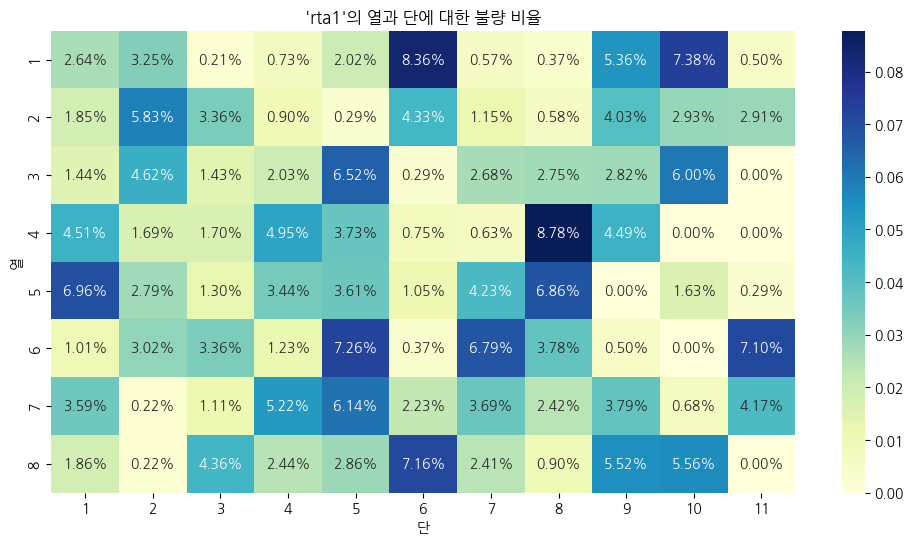

In [8]:
# rta1의 열과 단을 선택
column = 'rta1_box_col'
dan = 'rta1_box_dan'

# 'rta1'의 열과 단에 대한 불량 비율 계산
grouped = df.groupby([column, dan, 'judge']).size().unstack().fillna(0)
total_counts = grouped.sum(axis=1)
ratios = grouped['불량'] / total_counts


pivot_table = ratios.unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(data=pivot_table, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title("'rta1'의 열과 단에 대한 불량 비율")
plt.xlabel("단")
plt.ylabel("열")
plt.show()







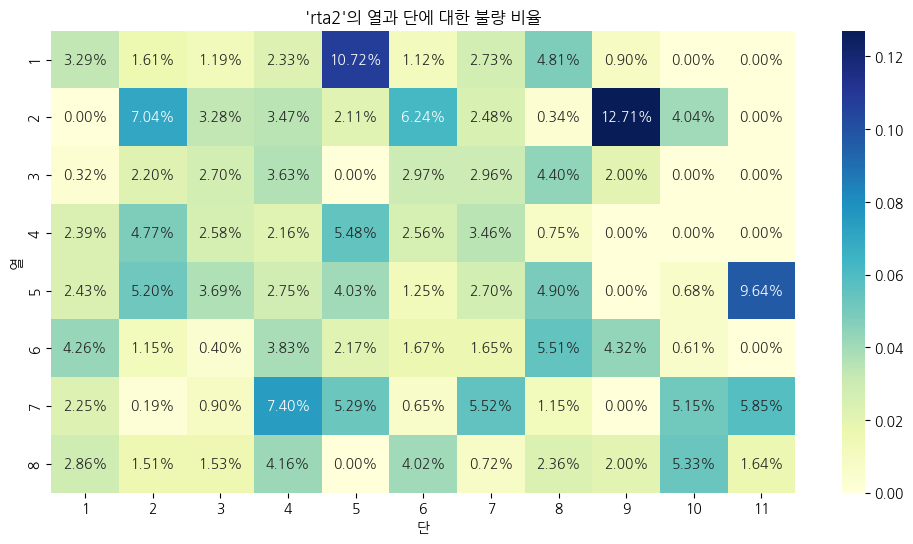

In [9]:
# rta2의 열과 단을 선택
column = 'rta2_box_col'
dan = 'rta2_box_dan'

# 'rta2'의 열과 단에 대한 불량 비율 계산
grouped = df.groupby([column, dan, 'judge']).size().unstack().fillna(0)
total_counts = grouped.sum(axis=1)
ratios = grouped['불량'] / total_counts


pivot_table = ratios.unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(data=pivot_table, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title("'rta2'의 열과 단에 대한 불량 비율")
plt.xlabel("단")
plt.ylabel("열")
plt.show()

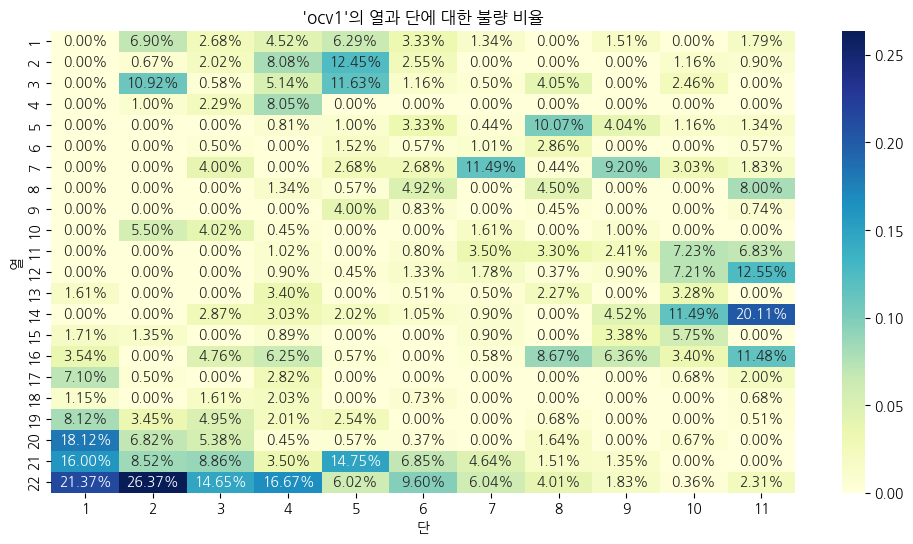

In [10]:
# ocv1의 열과 단을 선택
column = 'ocv1_box_col'
dan = 'ocv1_box_dan'

# 'ocv1'의 열과 단에 대한 불량 비율 계산
grouped = df.groupby([column, dan, 'judge']).size().unstack().fillna(0)
total_counts = grouped.sum(axis=1)
ratios = grouped['불량'] / total_counts


pivot_table = ratios.unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(data=pivot_table, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title("'ocv1'의 열과 단에 대한 불량 비율")
plt.xlabel("단")
plt.ylabel("열")
plt.show()

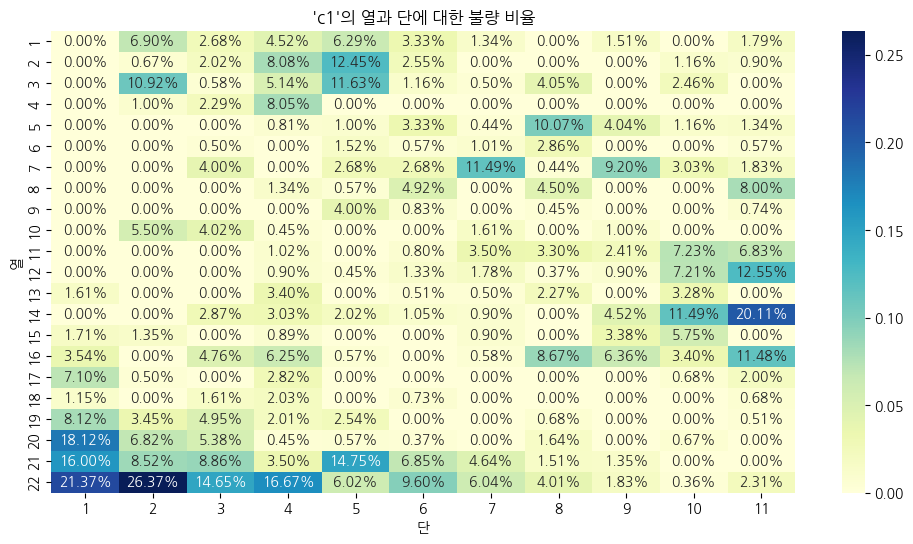

In [11]:
# c1의 열과 단을 선택
column = 'c1_box_col'
dan = 'c1_box_dan'

# 'c1'의 열과 단에 대한 불량 비율 계산
grouped = df.groupby([column, dan, 'judge']).size().unstack().fillna(0)
total_counts = grouped.sum(axis=1)
ratios = grouped['불량'] / total_counts


pivot_table = ratios.unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(data=pivot_table, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title("'c1'의 열과 단에 대한 불량 비율")
plt.xlabel("단")
plt.ylabel("열")
plt.show()

In [12]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway


pivot_table

# 피봇 테이블 데이터프레임으로 변환
df_pivo = pd.DataFrame(pivot_table)
# df.set_index(('c1_box_dan', ''), inplace=True)
# df.columns = pd.MultiIndex.from_tuples(df.columns)

print(df_pivo)






c1_box_dan        1         2         3         4         5         6   \
c1_box_col                                                               
1           0.000000  0.068966  0.026786  0.045226  0.062857  0.033333   
2           0.000000  0.006711  0.020202  0.080808  0.124498  0.025510   
3           0.000000  0.109195  0.005780  0.051429  0.116279  0.011628   
4           0.000000  0.010000  0.022857  0.080460  0.000000  0.000000   
5           0.000000  0.000000  0.000000  0.008097  0.010000  0.033333   
6           0.000000  0.000000  0.005000  0.000000  0.015152  0.005747   
7           0.000000  0.000000  0.040000  0.000000  0.026846  0.026846   
8           0.000000  0.000000  0.000000  0.013393  0.005714  0.049231   
9           0.000000  0.000000  0.000000  0.000000  0.040000  0.008333   
10          0.000000  0.055000  0.040230  0.004505  0.000000  0.000000   
11          0.000000  0.000000  0.000000  0.010152  0.000000  0.008000   
12          0.000000  0.000000  0.0000

In [18]:
from scipy.stats import f_oneway
from scipy import stats

# Good와 Bad 영역의 데이터 추출
bad_cols = [1, 2, 3]
bad_rows = [20, 21,22]

good_cols = [9, 10,11]
good_rows = [1, 2, 3]

bad_data = df_pivo.loc[bad_rows,bad_cols ].values.flatten()
good_data = df_pivo.loc[ good_rows,good_cols].values.flatten()

# ANOVA 검정
anova_result = stats.f_oneway(good_data, bad_data)

# 결과 출력
print("ANOVA 결과:")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue.round(3))


ANOVA 결과:
F-statistic: 29.74913456669271
p-value: 0.0


In [21]:
from scipy.stats import leven
# 정규성 검정
_, p_normal_good = stats.shapiro(good_data)
_, p_normal_bad = stats.shapiro(bad_data)

# 등분산성 검정
_, p_homogeneity = bartlett(good_data,bad_data)

# 결과 출력
print("정규성 검정 (Good): p-value =", p_normal_good)
print("정규성 검정 (Bad): p-value =", p_normal_bad)
print("등분산성 검정: p-value =", p_homogeneity.round(3))

정규성 검정 (Good): p-value = 0.10084183514118195
정규성 검정 (Bad): p-value = 0.5804147124290466
등분산성 검정: p-value = 0.001


In [23]:
from scipy.stats import levene
# 정규성 검정
_, p_normal_good = stats.shapiro(good_data)
_, p_normal_bad = stats.shapiro(bad_data)

# 등분산성 검정
_, p_homogeneity =  levene(good_data,bad_data)

# 결과 출력
print("정규성 검정 (Good): p-value =", p_normal_good)
print("정규성 검정 (Bad): p-value =", p_normal_bad)
print("등분산성 검정: p-value =", p_homogeneity.round(3))

정규성 검정 (Good): p-value = 0.10084183514118195
정규성 검정 (Bad): p-value = 0.5804147124290466
등분산성 검정: p-value = 0.001


In [20]:
from scipy.stats import chi2_contingency

data=[[good_data],[bad_data]]


# 카이제곱 검정 수행 (독립성)
chi2_stat, p_val, dof, expected = chi2_contingency(data)

# 결과 출력
print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)


Chi-square Statistic: 0.09765182501397045
p-value: 0.9999997722595281
Degrees of Freedom: 8
Expected Frequencies: [[[0.01144176 0.00397446 0.00417772 0.00932672 0.00564048 0.00568519
   0.01245757 0.01680713 0.00854096]]

 [[0.18484167 0.06420736 0.06749108 0.15067328 0.09112201 0.0918443
   0.20125211 0.2715193  0.13797919]]]


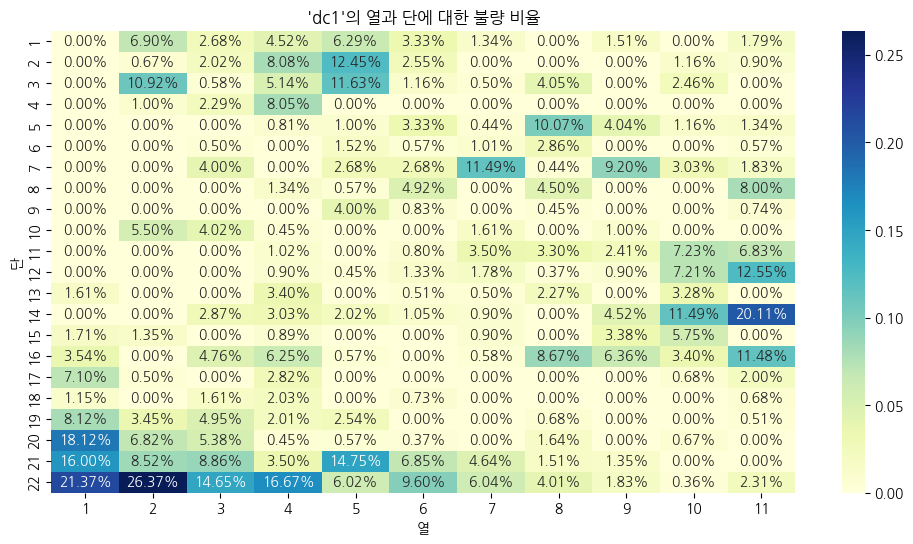

In [37]:
# dc1의 열과 단을 선택
column = 'dc1_box_col'
dan = 'dc1_box_dan'

# 'dc1'의 열과 단에 대한 불량 비율 계산
grouped = df.groupby([column, dan, 'judge']).size().unstack().fillna(0)
total_counts = grouped.sum(axis=1)
ratios = grouped['불량'] / total_counts


pivot_table = ratios.unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(data=pivot_table, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title("'dc1'의 열과 단에 대한 불량 비율")
plt.xlabel("열")
plt.ylabel("단")
plt.show()

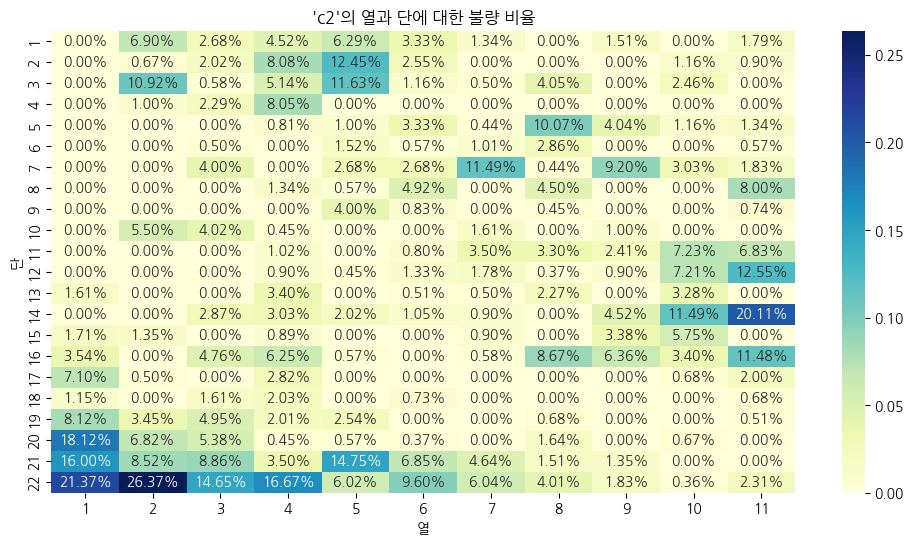

In [38]:
# c2의 열과 단을 선택
column = 'c2_box_col'
dan = 'c2_box_dan'

# 'c2'의 열과 단에 대한 불량 비율 계산
grouped = df.groupby([column, dan, 'judge']).size().unstack().fillna(0)
total_counts = grouped.sum(axis=1)
ratios = grouped['불량'] / total_counts


pivot_table = ratios.unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(data=pivot_table, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title("'c2'의 열과 단에 대한 불량 비율")
plt.xlabel("열")
plt.ylabel("단")
plt.show()

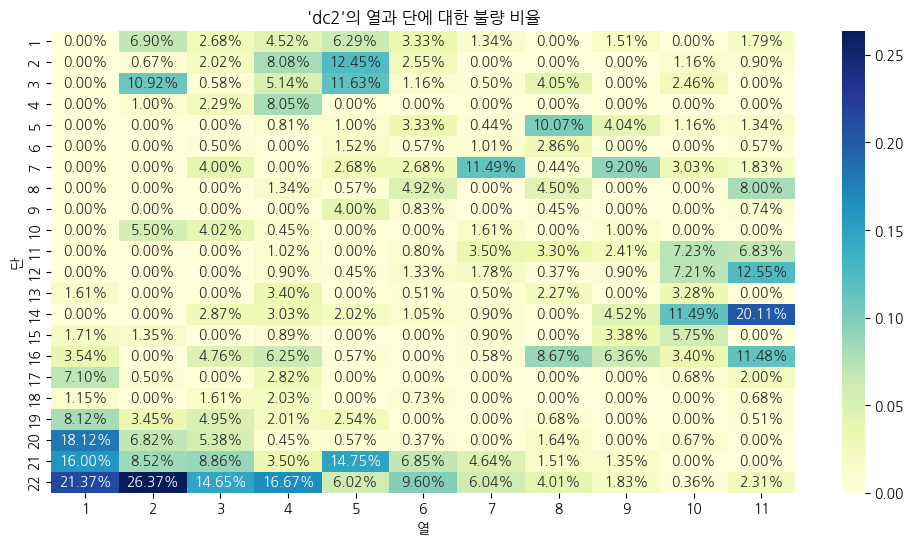

In [39]:
# dc2의 열과 단을 선택
column = 'dc2_box_col'
dan = 'dc2_box_dan'

# 'dc2'의 열과 단에 대한 불량 비율 계산
grouped = df.groupby([column, dan, 'judge']).size().unstack().fillna(0)
total_counts = grouped.sum(axis=1)
ratios = grouped['불량'] / total_counts


pivot_table = ratios.unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(data=pivot_table, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title("'dc2'의 열과 단에 대한 불량 비율")
plt.xlabel("열")
plt.ylabel("단")
plt.show()

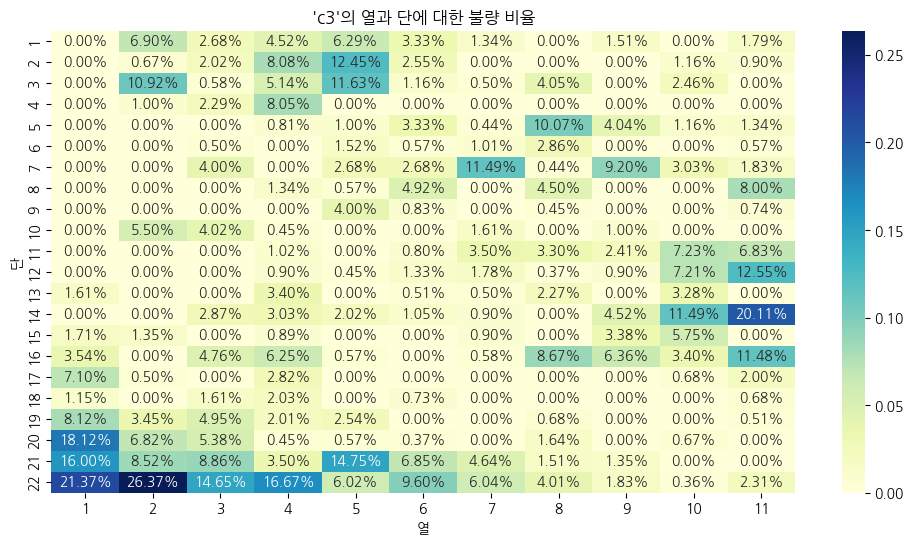

In [40]:
# c3의 열과 단을 선택
column = 'c3_box_col'
dan = 'c3_box_dan'

# 'c3'의 열과 단에 대한 불량 비율 계산
grouped = df.groupby([column, dan, 'judge']).size().unstack().fillna(0)
total_counts = grouped.sum(axis=1)
ratios = grouped['불량'] / total_counts


pivot_table = ratios.unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(data=pivot_table, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title("'c3'의 열과 단에 대한 불량 비율")
plt.xlabel("열")
plt.ylabel("단")
plt.show()

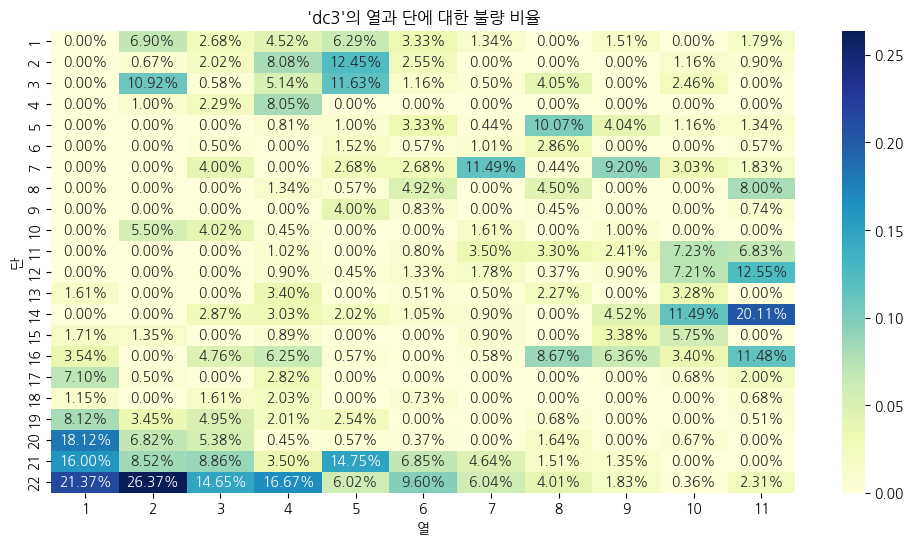

In [41]:
# dc3의 열과 단을 선택
column = 'dc3_box_col'
dan = 'dc3_box_dan'

# 'dc3'의 열과 단에 대한 불량 비율 계산
grouped = df.groupby([column, dan, 'judge']).size().unstack().fillna(0)
total_counts = grouped.sum(axis=1)
ratios = grouped['불량'] / total_counts


pivot_table = ratios.unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(data=pivot_table, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title("'dc3'의 열과 단에 대한 불량 비율")
plt.xlabel("열")
plt.ylabel("단")
plt.show()

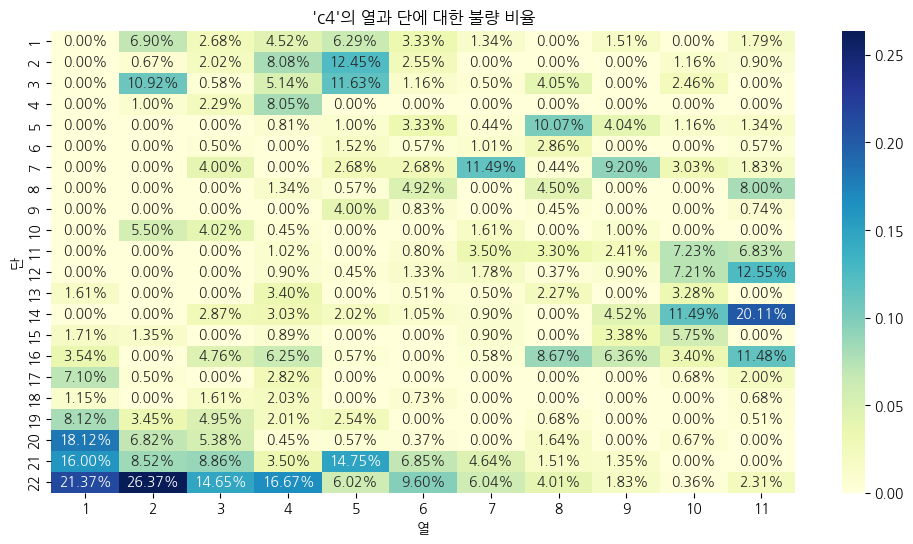

In [42]:
# c4의 열과 단을 선택
column = 'c4_box_col'
dan = 'c4_box_dan'

# 'rta2'의 열과 단에 대한 불량 비율 계산
grouped = df.groupby([column, dan, 'judge']).size().unstack().fillna(0)
total_counts = grouped.sum(axis=1)
ratios = grouped['불량'] / total_counts


pivot_table = ratios.unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(data=pivot_table, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title("'c4'의 열과 단에 대한 불량 비율")
plt.xlabel("열")
plt.ylabel("단")
plt.show()

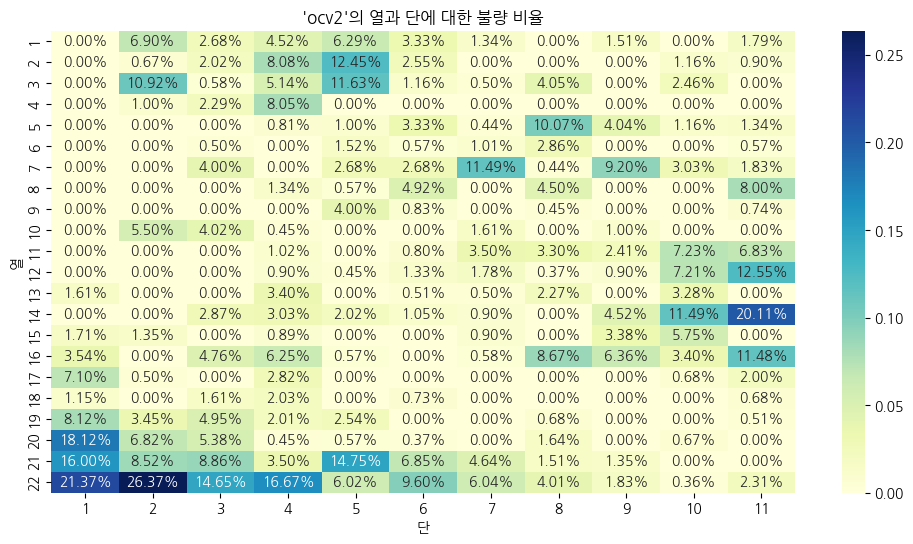

In [43]:
# ocv2의 열과 단을 선택
column = 'ocv2_box_col'
dan = 'ocv2_box_dan'

# 'rta1'의 열과 단에 대한 불량 비율 계산
grouped = df.groupby([column, dan, 'judge']).size().unstack().fillna(0)
total_counts = grouped.sum(axis=1)
ratios = grouped['불량'] / total_counts


pivot_table = ratios.unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(data=pivot_table, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title("'ocv2'의 열과 단에 대한 불량 비율")
plt.xlabel("단")
plt.ylabel("열")
plt.show()

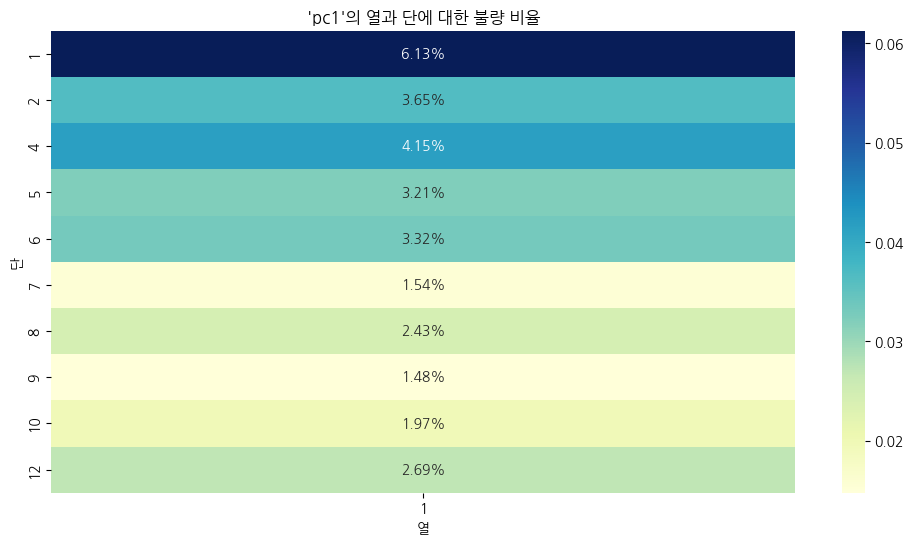

In [45]:
# pc1의 열과 단을 선택
column = 'pc1_box_col'
dan = 'pc1_box_dan'

# 'pc1'의 열과 단에 대한 불량 비율 계산
grouped = df.groupby([column, dan, 'judge']).size().unstack().fillna(0)
total_counts = grouped.sum(axis=1)
ratios = grouped['불량'] / total_counts


pivot_table = ratios.unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(data=pivot_table, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title("'pc1'의 열과 단에 대한 불량 비율")
plt.xlabel("열")
plt.ylabel("단")
plt.show()

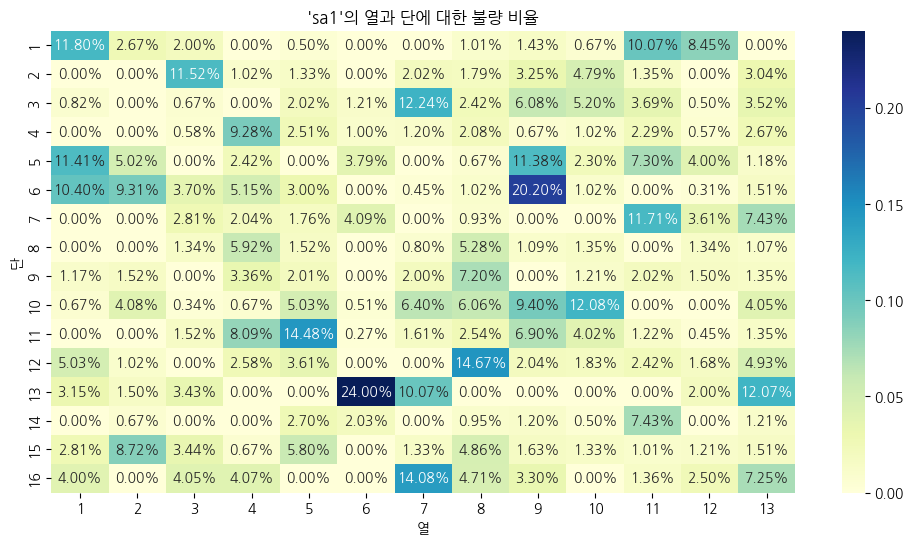

In [46]:
# sa1의 열과 단을 선택
column = 'sa1_box_col'
dan = 'sa1_box_dan'

# 'sa1'의 열과 단에 대한 불량 비율 계산
grouped = df.groupby([column, dan, 'judge']).size().unstack().fillna(0)
total_counts = grouped.sum(axis=1)
ratios = grouped['불량'] / total_counts


pivot_table = ratios.unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(data=pivot_table, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title("'sa1'의 열과 단에 대한 불량 비율")
plt.xlabel("열")
plt.ylabel("단")
plt.show()

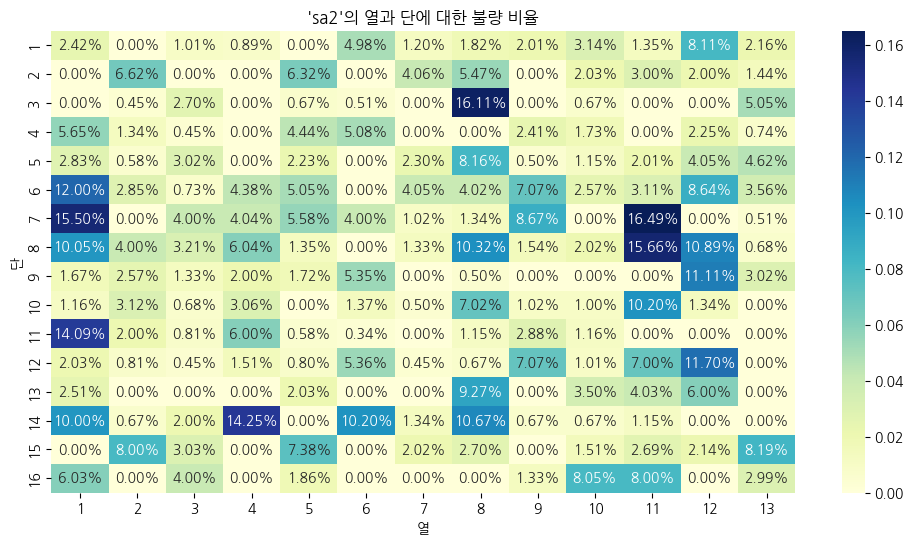

In [47]:
# sa2의 열과 단을 선택
column = 'sa2_box_col'
dan = 'sa2_box_dan'

# 'sa2'의 열과 단에 대한 불량 비율 계산
grouped = df.groupby([column, dan, 'judge']).size().unstack().fillna(0)
total_counts = grouped.sum(axis=1)
ratios = grouped['불량'] / total_counts


pivot_table = ratios.unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(data=pivot_table, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title("'sa2'의 열과 단에 대한 불량 비율")
plt.xlabel("열")
plt.ylabel("단")
plt.show()

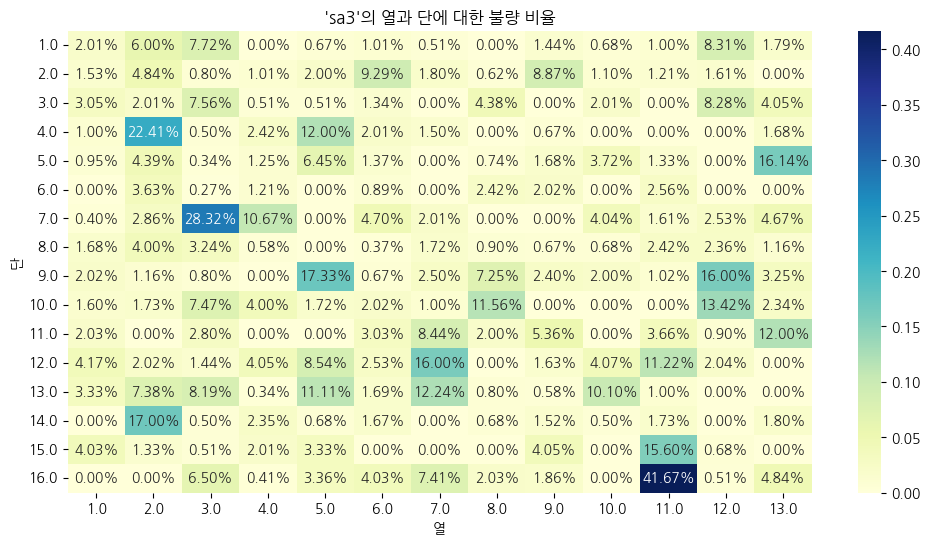

In [48]:
# sa3의 열과 단을 선택
column = 'sa3_box_col'
dan = 'sa3_box_dan'

# 'sa3'의 열과 단에 대한 불량 비율 계산
grouped = df.groupby([column, dan, 'judge']).size().unstack().fillna(0)
total_counts = grouped.sum(axis=1)
ratios = grouped['불량'] / total_counts


pivot_table = ratios.unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(data=pivot_table, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title("'sa3'의 열과 단에 대한 불량 비율")
plt.xlabel("열")
plt.ylabel("단")
plt.show()

rta2_box_col에 대한 불량 비율:
rta2_box_col
2    0.041418
1    0.035700
5    0.032632
7    0.031437
4    0.031103
6    0.025830
3    0.025049
8    0.022406
dtype: float64
rta2_box_row에 대한 불량 비율:
rta2_box_row
61    0.097152
10    0.083019
26    0.081037
27    0.076923
3     0.068966
63    0.068966
57    0.064690
48    0.063830
19    0.062409
53    0.062016
47    0.058323
45    0.058000
38    0.052795
52    0.049123
7     0.042959
dtype: float64
rta2_box_dan에 대한 불량 비율:
rta2_box_dan
5     0.043856
11    0.040948
9     0.038511
4     0.035421
8     0.034036
2     0.032648
7     0.028311
1     0.024025
6     0.023825
3     0.021364
10    0.018842
dtype: float64


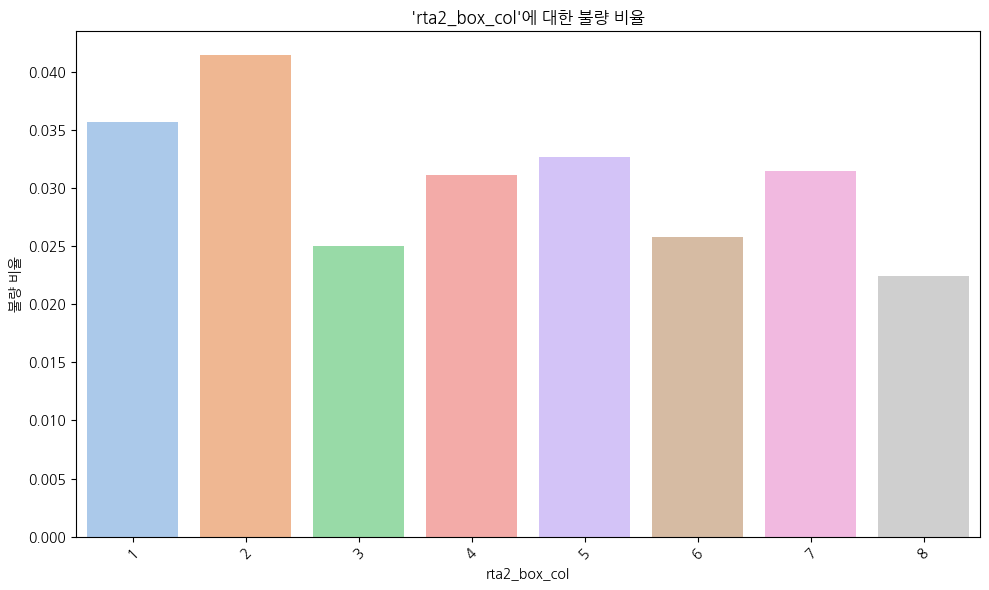

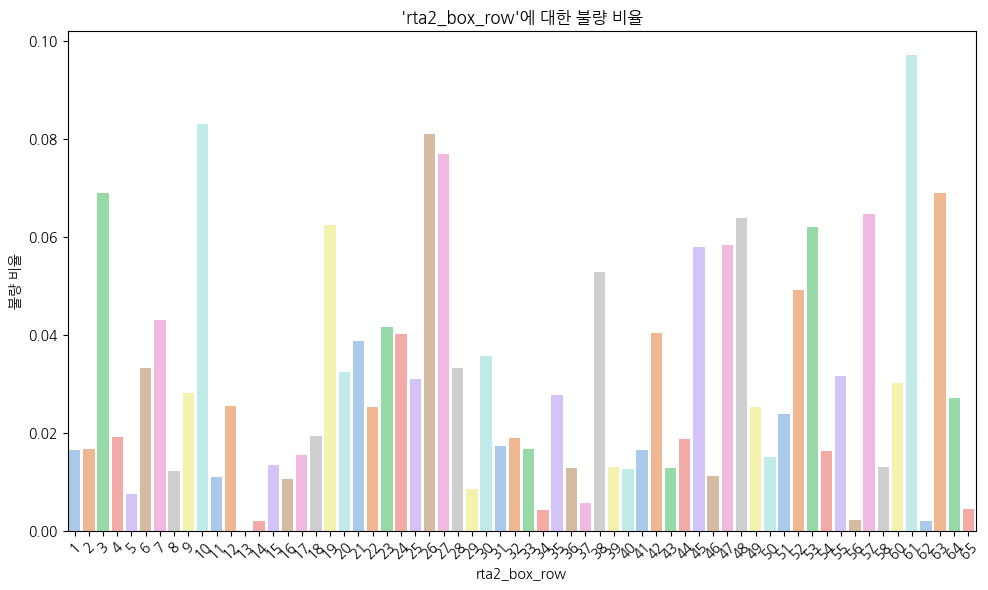

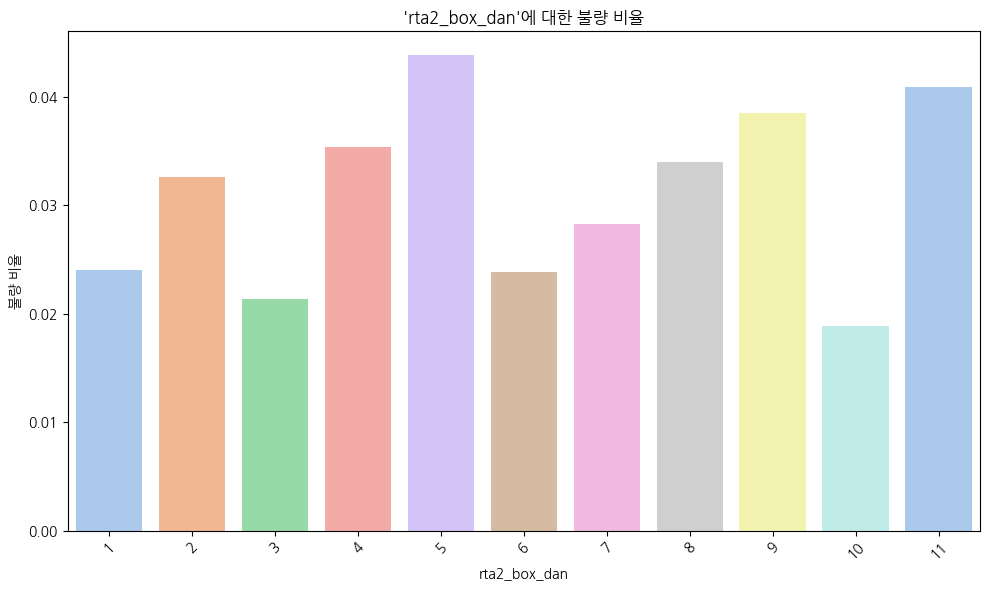

In [49]:
# 'hta2'의 행, 열, 단에 대한 불량과 양품의 비율 계산
rta2_columns = ['rta2_box_col', 'rta2_box_row', 'rta2_box_dan']  # 'rta'의 열들
result = {}  # 결과를 저장할 딕셔너리 초기화

for column in rta2_columns:
    grouped = df.groupby([column, 'judge']).size().unstack()
    total_counts = grouped.sum(axis=1)
    ratios = grouped['불량'] / total_counts
    result[column] = ratios

# 결과 출력
for column, ratios in result.items():
    print(f"{column}에 대한 불량 비율:\n{ratios.sort_values(ascending=False).head(15)}")

for column, ratios in result.items():
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=ratios.index, y=ratios.values, palette='pastel')
    plt.title(f"'{column}'에 대한 불량 비율")
    plt.xlabel(column)
    plt.ylabel("불량 비율")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# 'ocv2'의 행, 열, 단에 대한 불량과 양품의 비율 계산
ocv2_columns = ['ocv2_box_col',  'ocv2_box_dan']  # 'rta'의 열들
result = {}  # 결과를 저장할 딕셔너리 초기화

for column in ocv2_columns:
    grouped = df.groupby([column, 'judge']).size().unstack()
    total_counts = grouped.sum(axis=1)
    ratios = grouped['불량'] / total_counts
    result[column] = ratios

# 결과 출력
for column, ratios in result.items():
    print(f"{column}에 대한 불량 비율:\n{ratios.sort_values(ascending=False).head(15)}")

for column, ratios in result.items():
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=ratios.index, y=ratios.values, palette='pastel')
    plt.title(f"'{column}'에 대한 불량 비율")
    plt.xlabel(column)
    plt.ylabel("불량 비율")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [50]:
selected_cols = ['judge', 'c1_curr_end', 'c1_voltage_avg', 'c1_temp_avg']
df_c1 = df[selected_cols]

print(df_c1)

      judge  c1_curr_end  c1_voltage_avg  c1_temp_avg
0        양품         6799            3779          278
1        양품         6800            3779          278
2        양품         6802            3779          278
3        양품         6799            3779          278
4        양품         6802            3779          278
...     ...          ...             ...          ...
40989    양품         6799            3779          255
40990    양품         6800            3779          255
40991    양품         6800            3781          255
40992    양품         6802            3780          255
40993    불량         6799            3781          255

[40994 rows x 4 columns]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_9926/3290976280.py:26: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_9926/3290976280.py:26: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  plt.tight_layout()
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


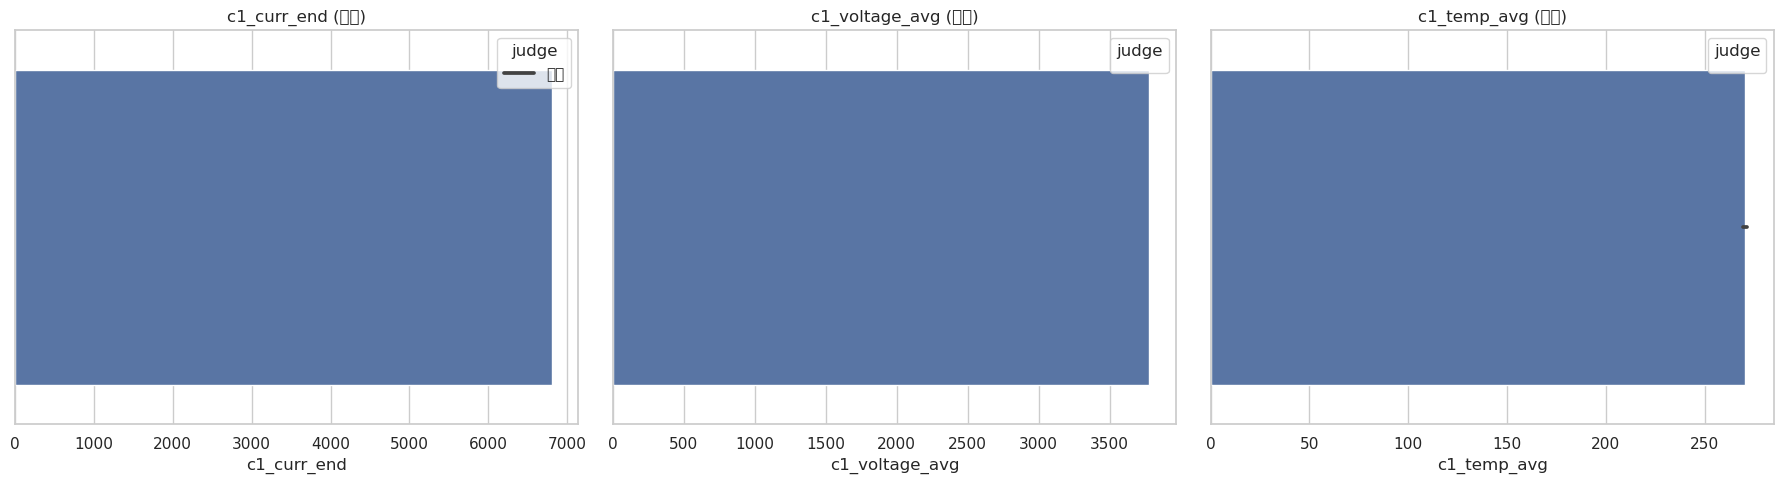

In [83]:
# 시각화 설정
sns.set(style='whitegrid')

# 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 불량품만 필터링
defect_df = df[df['judge'] == '불량']

# 'c1_curr_end' 히스토그램
sns.barplot(data=defect_df, x='c1_curr_end', hue='judge', ax=axes[0])
axes[0].set_title('c1_curr_end (불량)')
axes[0].legend(title='judge', labels=['불량'])

# 'c1_voltage_avg' 히스토그램
sns.barplot(data=defect_df, x='c1_voltage_avg', hue='judge', ax=axes[1])
axes[1].set_title('c1_voltage_avg (불량)')
axes[1].legend(title='judge')

# 'c1_temp_avg' 히스토그램
sns.barplot(data=defect_df, x='c1_temp_avg', hue='judge',  ax=axes[2])
axes[2].set_title('c1_temp_avg (불량)')
axes[2].legend(title='judge')

# 서브플롯 간 간격 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()


/tmp/ipykernel_9926/2162088288.py:25: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_9926/2162088288.py:25: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  plt.tight_layout()
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


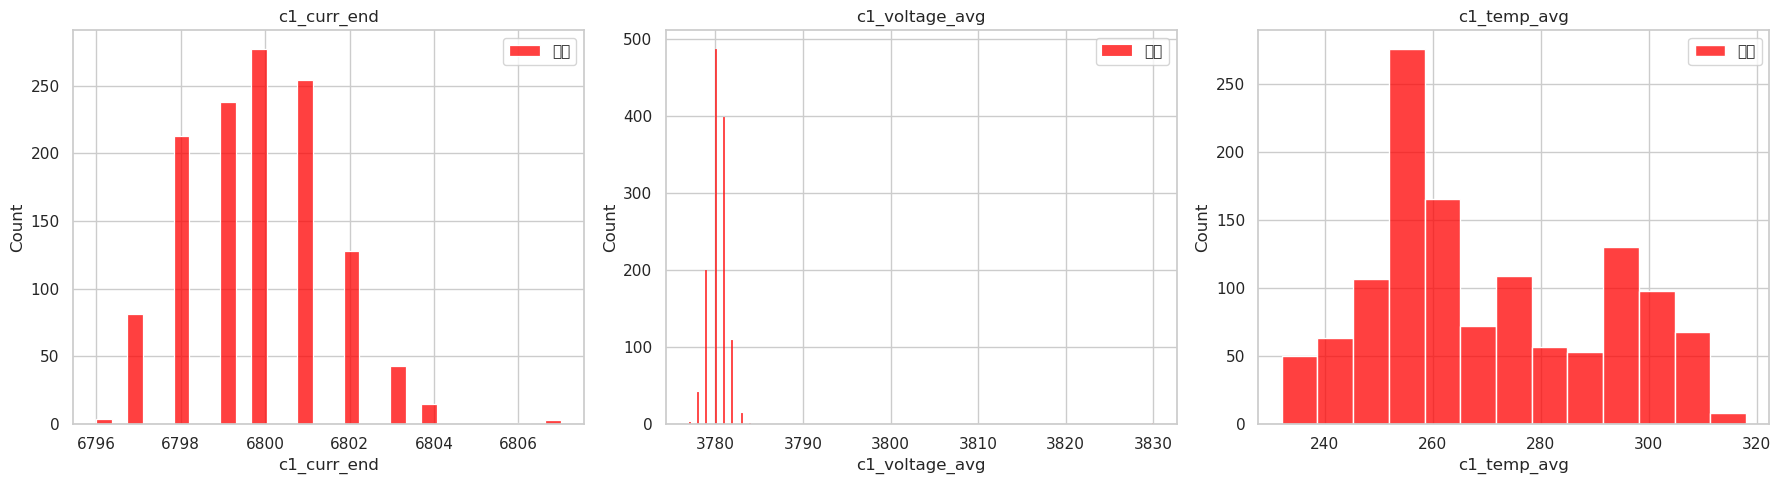

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 설정
sns.set(style='whitegrid')

# 불량품과 양품 데이터 분리
defect_df = df[df['judge'] == '불량']


# 변수 리스트
variables = ['c1_curr_end', 'c1_voltage_avg', 'c1_temp_avg']

# 서브플롯 생성
fig, axes = plt.subplots(1, len(variables), figsize=(18, 5))

# 각 변수별로 막대 그래프 그리기
for i, var in enumerate(variables):
    ax = sns.histplot(data=defect_df, x=var, color='red', ax=axes[i], label='불량')
    
    ax.set_title(var)
    ax.legend()

# 서브플롯 간 간격 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()


In [36]:
# 조건에 맞는 데이터 추출
filtered_df = df[
    (df['c1_box_col'].isin([ 20, 21, 22])) &
    (df['c1_box_dan'].isin([1, 2, 3]))


]

# 새로운 DataFrame 생성
new_df1 = pd.DataFrame(filtered_df)

# 결과 출력
print(new_df1)

         tray_id judge  rta1_cell_no  rta1_box_col  rta1_box_row  \
667    TRAY-1132    양품            18             1            46   
668    TRAY-1132    양품            11             1            46   
669    TRAY-1132    양품            17             1            46   
670    TRAY-1132    양품            12             1            46   
671    TRAY-1132    양품            20             1            46   
...          ...   ...           ...           ...           ...   
40891  TRAY-2787    불량            18             7            17   
40892  TRAY-2787    양품             8             7            17   
40893  TRAY-2787    양품             1             7            17   
40894  TRAY-2787    불량            10             7            17   
40895  TRAY-2787    양품            15             7            17   

       rta1_box_dan  hta1_box_col  hta1_box_row  hta1_box_dan  rta2_box_col  \
667              10             3            44             8             7   
668              10      

In [37]:
# 조건에 맞는 데이터 추출
filtered_df = df[
       (df['c1_box_col'].isin([1, 2, 3])) &
    (df['c1_box_dan'].isin([ 9, 10, 11]))


]

# 새로운 DataFrame 생성
new_df2 = pd.DataFrame(filtered_df)

# 결과 출력
print(new_df2)




         tray_id judge  rta1_cell_no  rta1_box_col  rta1_box_row  \
3026   TRAY-1178    양품            20             7            20   
3027   TRAY-1178    양품             5             7            20   
3028   TRAY-1178    양품            18             7            20   
3029   TRAY-1178    양품            23             7            20   
3030   TRAY-1178    양품            15             7            20   
...          ...   ...           ...           ...           ...   
40964  TRAY-2790    양품             9             8            21   
40965  TRAY-2790    양품            19             8            21   
40966  TRAY-2790    양품            21             8            21   
40967  TRAY-2790    양품            13             8            21   
40968  TRAY-2790    양품            10             8            21   

       rta1_box_dan  hta1_box_col  hta1_box_row  hta1_box_dan  rta2_box_col  \
3026              8             2            11             5             5   
3027              8      

In [38]:

# 두 개의 DataFrame을 합치기
combined_df = pd.concat([new_df1, new_df2], ignore_index=True)

# 결과 출력
print(combined_df)

        tray_id judge  rta1_cell_no  rta1_box_col  rta1_box_row  rta1_box_dan  \
0     TRAY-1132    양품            18             1            46            10   
1     TRAY-1132    양품            11             1            46            10   
2     TRAY-1132    양품            17             1            46            10   
3     TRAY-1132    양품            12             1            46            10   
4     TRAY-1132    양품            20             1            46            10   
...         ...   ...           ...           ...           ...           ...   
3507  TRAY-2790    양품             9             8            21             3   
3508  TRAY-2790    양품            19             8            21             3   
3509  TRAY-2790    양품            21             8            21             3   
3510  TRAY-2790    양품            13             8            21             3   
3511  TRAY-2790    양품            10             8            21             3   

      hta1_box_col  hta1_bo

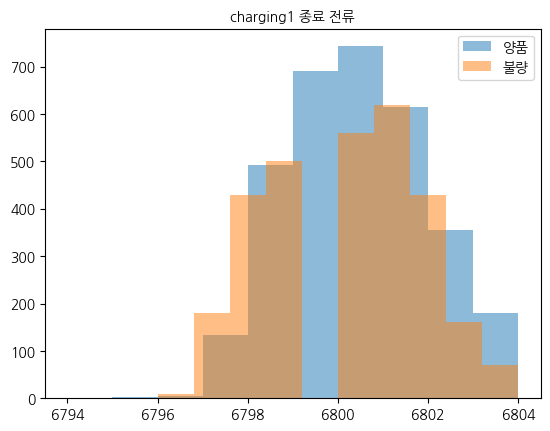

In [27]:
plt.hist(combined_df[combined_df['judge'] == '양품']['c1_curr_end'],label='양품', alpha = 0.5)
plt.hist(combined_df[combined_df['judge'] == '불량']['c1_curr_end'],label='불량', alpha = 0.5, weights=[10] * len(combined_df[combined_df['judge'] == '불량']))
plt.title('charging1 종료 전류', fontsize=10)
plt.legend()

In [28]:
from scipy.stats import ttest_ind

# 양품과 불량의 데이터 프레임 분리
good_df = combined_df[combined_df['judge'] == '양품']
defective_df = combined_df[combined_df['judge'] == '불량']

# 'c1_voltage_avg' 열의 평균 계산
good_mean = good_df['c1_curr_end'].mean()
defective_mean = defective_df['c1_curr_end'].mean()

# t-test 수행
t_stat, p_value = ttest_ind(good_df['c1_curr_end'], defective_df['c1_curr_end'], equal_var=False)

# 결과 출력
print(f"양품 평균: {good_mean:.2f}")
print(f"불량 평균: {defective_mean:.2f}")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.4f}")

양품 평균: 6799.93
불량 평균: 6800.10
t-statistic: -1.61
p-value: 0.1077


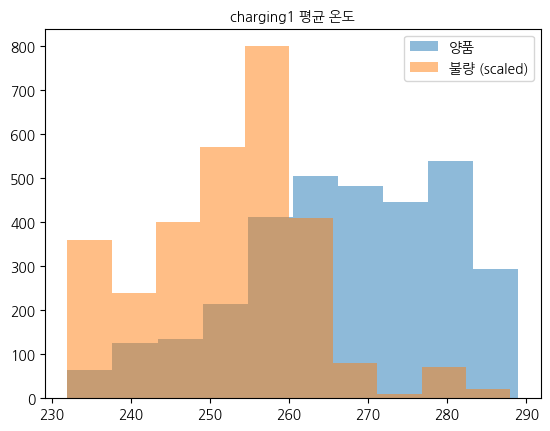

In [29]:
import matplotlib.pyplot as plt

# 양품과 불량의 평균 온도 히스토그램 비교
plt.hist(combined_df[combined_df['judge'] == '양품']['c1_temp_avg'], label='양품', alpha=0.5)
plt.hist(combined_df[combined_df['judge'] == '불량']['c1_temp_avg'], label='불량 (scaled)', alpha=0.5, weights=[10] * len(combined_df[combined_df['judge'] == '불량']))
plt.title('charging1 평균 온도', fontsize=10)
plt.legend()
plt.show()


In [30]:
from scipy.stats import ttest_ind

# 양품과 불량의 데이터 프레임 분리
good_df = combined_df[combined_df['judge'] == '양품']
defective_df = combined_df[combined_df['judge'] == '불량']

# 'c1_voltage_avg' 열의 평균 계산
good_mean = good_df['c1_temp_avg'].mean()
defective_mean = defective_df['c1_temp_avg'].mean()

# t-test 수행
t_stat, p_value = ttest_ind(good_df['c1_temp_avg'], defective_df['c1_temp_avg'], equal_var=False)

# 결과 출력
print(f"양품 평균: {good_mean:.2f}")
print(f"불량 평균: {defective_mean:.2f}")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.4f}")

양품 평균: 267.06
불량 평균: 252.52
t-statistic: 22.04
p-value: 0.0000


In [32]:
combined_df = combined_df[combined_df['c1_voltage_avg'] < 3800]

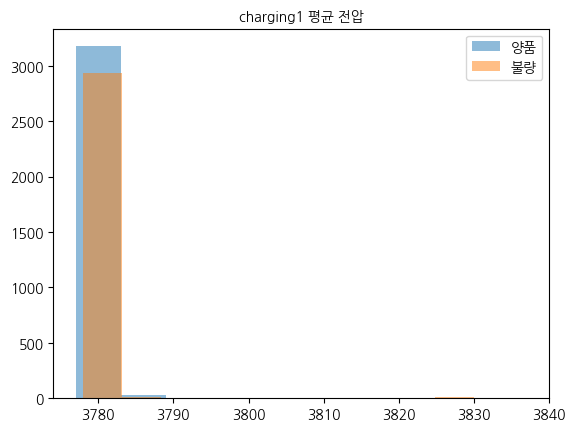

In [39]:
plt.hist(combined_df[combined_df['judge'] == '양품']['c1_voltage_avg'],label='양품', alpha = 0.5)
plt.hist(combined_df[combined_df['judge'] == '불량']['c1_voltage_avg'],label='불량', alpha = 0.5, weights=[10] * len(combined_df[combined_df['judge'] == '불량']))
plt.title('charging1 평균 전압', fontsize=10)
plt.legend()

In [40]:
from scipy.stats import ttest_ind

# 양품과 불량의 데이터 프레임 분리
good_df = combined_df[combined_df['judge'] == '양품']
defective_df = combined_df[combined_df['judge'] == '불량']

# 'c1_voltage_avg' 열의 평균 계산
good_mean = good_df['c1_voltage_avg'].mean()
defective_mean = defective_df['c1_voltage_avg'].mean()

# t-test 수행
t_stat, p_value = ttest_ind(good_df['c1_voltage_avg'], defective_df['c1_voltage_avg'], equal_var=False)

# 결과 출력
print(f"양품 평균: {good_mean:.2f}")
print(f"불량 평균: {defective_mean:.2f}")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.4f}")

양품 평균: 3780.38
불량 평균: 3780.76
t-statistic: -2.10
p-value: 0.0368
